<a href="https://colab.research.google.com/github/vijayasri-manda/Data-Science/blob/main/Data%20Analysis/Fashion(Data_Points).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
plt.switch_backend('agg')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc
%matplotlib inline
sns.set(style = 'whitegrid')
np.random.seed(42)

In [ ]:
df = pd.read_csv('Fashion(Data Points) - Form responses 1.csv')

In [ ]:
df.head()

Timestamp   1.Age Group     2.Gender     3.Profession    \
0  14/01/2025 19:33:18           18–24       Female          Student   
1  21/01/2025 22:13:55           18–24       Female          Student   
2  21/01/2025 22:24:31           18–24       Female          Student   
3  21/01/2025 22:25:53           18–24         Male          Student   
4  21/01/2025 22:38:46           18–24         Male          Student   

  Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)    \
0                     Chic (e.g., tailored, stylish)                                                
1                     Casual (e.g., jeans, t-shirts)                                                
2                     Casual (e.g., jeans, t-shirts)                                                
3                     Casual (e.g., jeans, t-shirts)                                                
4                     Casual (e.g., jeans, t-shirts)                                                

   5. What’s your favorite color palette for clothing?    \
0                     Pastels (soft pink, baby blue)       
1                          Dark tones (navy, maroon)       
2                      Neutral (black, white, beige)       
3                      Neutral (black, white, beige)       
4                      Neutral (black, white, beige)       

   6. Do you prioritize functionality or aesthetics in your outfits?    \
0                         Slightly prefer aesthetics                     
1                      Slightly prefer functionality                     
2                      Slightly prefer functionality                     
3                              Equal balance of both                     
4                         Slightly prefer aesthetics                     

    7.Which of these best describes your wardrobe?    \
0                      Mix-and-match (varied styles)   
1                      Mix-and-match (varied styles)   
2                  Minimalist (few versatile pieces)   
3                Specialized (specific to one style)   
4                  Minimalist (few versatile pieces)   

  Section 3: Shopping Habits\n8. How often do you shop for new clothes?    \
0                                             Rarely                        
1                                   Every few months                        
2                                            Monthly                        
3                                   Every few months                        
4                                             Rarely                        

    9.What influences your clothing purchases the most?    \
0                                            Comfort        
1                                     Sustainability        
2                                            Comfort        
3                                            Comfort        
4                                            Comfort        

   10. Where do you typically shop for clothes? (Select all that apply)    \
0                                    Local boutiques                        
1                                      Thrift stores                        
2                                    Local boutiques                        
3                                      Thrift stores                        
4                                      Thrift stores                        

  Section 4: Lifestyle\n11. How often do you attend formal events?    \
0                - Occasionally (a few times a year)                   
1                - Occasionally (a few times a year)                   
2                - Occasionally (a few times a year)                   
3                   - Rarely (less than once a year)                   
4                - Occasionally (a few times a year)                   

    12.Do you often experiment with new styles or stick to what you know?    \
0                        

In [ ]:
df.shape

(150, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Timestamp                                                                                       150 non-null    object 
 1     1.Age Group                                                                                   150 non-null    object 
 2     2.Gender                                                                                      150 non-null    object 
 3     3.Profession                                                                                  150 non-null    object 
 4   Section 2: Style Preferences
4. How would you describe your go-to daily outfit? (Select one)    149 non-null    object 
 5    5. What’s your

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.head(1)

Timestamp 1.Age Group 2.Gender 3.Profession  \
0  14/01/2025 19:33:18       18–24   Female      Student   

  Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)  \
0                     Chic (e.g., tailored, stylish)                                              

  5. What’s your favorite color palette for clothing?  \
0                     Pastels (soft pink, baby blue)    

  6. Do you prioritize functionality or aesthetics in your outfits?  \
0                         Slightly prefer aesthetics                  

  7.Which of these best describes your wardrobe?  \
0                  Mix-and-match (varied styles)   

  Section 3: Shopping Habits\n8. How often do you shop for new clothes?  \
0                                             Rarely                      

  9.What influences your clothing purchases the most?  \
0                                            Comfort    

  10. Where do you typically shop for clothes? (Select all that apply)  \
0                                    Local boutiques                     

  Section 4: Lifestyle\n11. How often do you attend formal events?  \
0                - Occasionally (a few times a year)                 

  12.Do you often experiment with new styles or stick to what you know?  \
0                               Sometimes experiment                      

  13. What kind of footwear do you wear most often?  \
0                                          Sneakers   

  14. How active is your daily lifestyle?  \
0                        Mostly sedentary   

  Section 5: Personal Preferences\n15. How important is comfort in your clothing choices  \
0                              - Extremely important                                       

  16.If you had to choose, would you prefer timeless pieces or trendy items?  \
0                       Mostly trendy, some timeless                           

   17. From scale 1-10 how much do you think your clothing style reflects about your personality?  \
0                                                8.0                                                

   Section 2: Style Preferences  Column 18  
0                           NaN        NaN

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [ ]:
df.isnull().sum()


Timestamp                                                                                           0
1.Age Group                                                                                         0
2.Gender                                                                                            0
3.Profession                                                                                        0
Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)       1
5. What’s your favorite color palette for clothing?                                                 0
6. Do you prioritize functionality or aesthetics in your outfits?                                   1
7.Which of these best describes your wardrobe?                                                      2
Section 3: Shopping Habits\n8. How often do you shop for new clothes?                               1
9.What influences your clothing purchases the most?                                                 2
10. Where do you typically shop for clothes? (Select all that apply)                                2
Section 4: Lifestyle\n11. How often do you attend formal events?                                    2
12.Do you often experiment with new styles or stick to what you know?                               2
13. What kind of footwear do you wear most often?                                                   2
14. How active is your daily lifestyle?                                                             2
Section 5: Personal Preferences\n15. How important is comfort in your clothing choices              2
16.If you had to choose, would you prefer timeless pieces or trendy items?                          4
17. From scale 1-10 how much do you think your clothing style reflects about your personality?      3
Section 2: Style Preferences                                                                      150
Column 18                                                                                         150
dtype: int64

In [ ]:
df.drop(columns = ['Section2:Style Preferences','Column 18'], axis=1,errors='ignore')


Timestamp 1.Age Group 2.Gender 3.Profession  \
0   2025-01-14 19:33:18       18–24   Female      Student   
1   2025-01-21 22:13:55       18–24   Female      Student   
2   2025-01-21 22:24:31       18–24   Female      Student   
3   2025-01-21 22:25:53       18–24     Male      Student   
4   2025-01-21 22:38:46       18–24     Male      Student   
..                  ...         ...      ...          ...   
145 2025-01-31 18:01:08       18–24     Male      Student   
146 2025-01-31 18:30:24       18–24     Male      Student   
147 2025-02-03 23:34:39       18–24     Male      Student   
148 2025-02-04 00:03:43       18–24     Male      Student   
149 2025-02-17 22:08:18       18–24     Male      Student   

    Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)  \
0                       Chic (e.g., tailored, stylish)                                              
1                       Casual (e.g., jeans, t-shirts)                                              
2                       Casual (e.g., jeans, t-shirts)                                              
3                       Casual (e.g., jeans, t-shirts)                                              
4                       Casual (e.g., jeans, t-shirts)                                              
..                                                 ...                                              
145                      Formal (e.g., suits, dresses)                                              
146                Sporty (e.g., activewear, sneakers)                                              
147                     Casual (e.g., jeans, t-shirts)                                              
148                Sporty (e.g., activewear, sneakers)                                              
149                     Casual (e.g., jeans, t-shirts)                                              

    5. What’s your favorite color palette for clothing?  \
0                       Pastels (soft pink, baby blue)    
1                            Dark tones (navy, maroon)    
2                        Neutral (black, white, beige)    
3                        Neutral (black, white, beige)    
4                        Neutral (black, white, beige)    
..                                                 ...    
145                      Neutral (black, white, beige)    
146                                 Mixed or patterned    
147                      Neutral (black, white, beige)    
148                      Neutral (black, white, beige)    
149                      Neutral (black, white, beige)    

    6. Do you prioritize functionality or aesthetics in your outfits?  \
0                           Slightly prefer aesthetics                  
1                        Slightly prefer functionality                  
2                        Slightly prefer functionality                  
3                                Equal balance of both                  
4                           Slightly prefer aesthetics                  
..                                                 ...                  
145                      Strongly prefer functionality                  
146                      Slightly prefer functionality                  
147                              Equal balance of both                  
148                      Strongly prefer functionality                  
149                         Slightly prefer aesthetics                  

    7.Which of these best describes your wardrobe?  \
0                    Mix-and-match (varied styles)   
1                    Mix-and-match (varied styles)   
2                Minimalist (few versatile pieces)   
3              Specialized (specific to one style)   
4                Minimalist (few versatile pieces)   
..                                             ...   
145              Minimalist (few versatile pieces)   
146              Minimalist (few versatile pieces)

In [ ]:
df.isnull().sum()

Timestamp                                                                                           0
1.Age Group                                                                                         0
2.Gender                                                                                            0
3.Profession                                                                                        0
Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)       1
5. What’s your favorite color palette for clothing?                                                 0
6. Do you prioritize functionality or aesthetics in your outfits?                                   1
7.Which of these best describes your wardrobe?                                                      2
Section 3: Shopping Habits\n8. How often do you shop for new clothes?                               1
9.What influences your clothing purchases the most?                                                 2
10. Where do you typically shop for clothes? (Select all that apply)                                2
Section 4: Lifestyle\n11. How often do you attend formal events?                                    2
12.Do you often experiment with new styles or stick to what you know?                               2
13. What kind of footwear do you wear most often?                                                   2
14. How active is your daily lifestyle?                                                             2
Section 5: Personal Preferences\n15. How important is comfort in your clothing choices              2
16.If you had to choose, would you prefer timeless pieces or trendy items?                          4
17. From scale 1-10 how much do you think your clothing style reflects about your personality?      3
Section 2: Style Preferences                                                                      150
Column 18                                                                                         150
dtype: int64

In [ ]:
df.columns

Index(['Timestamp', '1.Age Group', '2.Gender', '3.Profession',
       'Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)',
       '5. What’s your favorite color palette for clothing?',
       '6. Do you prioritize functionality or aesthetics in your outfits?',
       '7.Which of these best describes your wardrobe?',
       'Section 3: Shopping Habits\n8. How often do you shop for new clothes?',
       '9.What influences your clothing purchases the most?',
       '10. Where do you typically shop for clothes? (Select all that apply)',
       'Section 4: Lifestyle\n11. How often do you attend formal events?',
       '12.Do you often experiment with new styles or stick to what you know?',
       '13. What kind of footwear do you wear most often?',
       '14. How active is your daily lifestyle?',
       'Section 5: Personal Preferences\n15. How important is comfort in your clothing choices',
       '16.If you had to choose, would you prefer timel

In [ ]:
categorical  = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(include = 'float64')

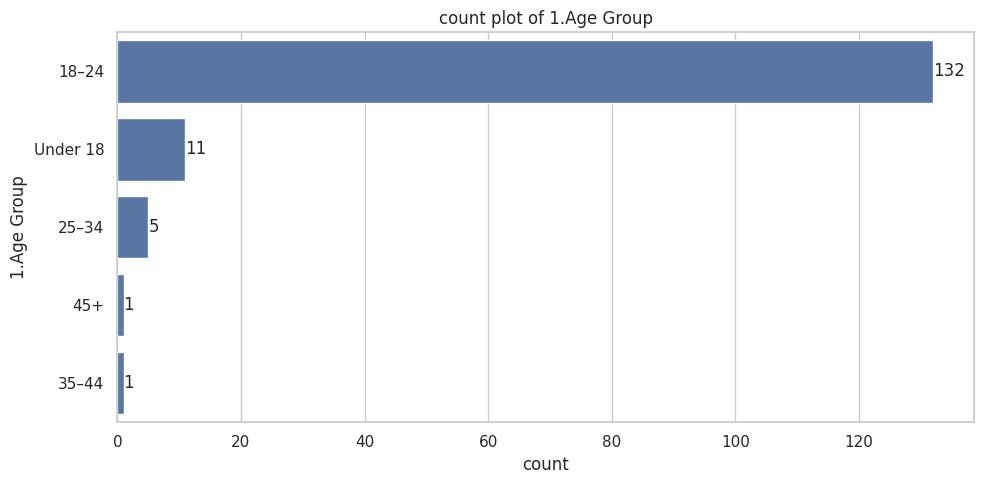

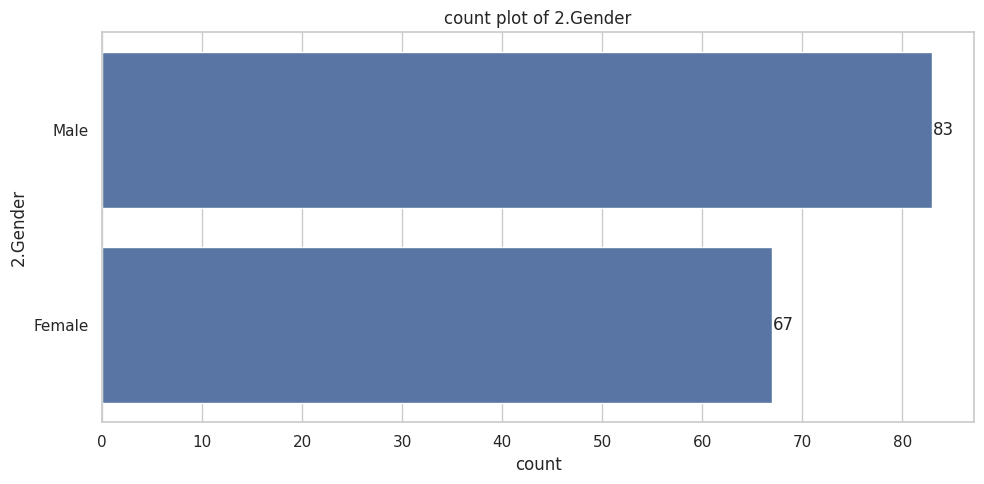

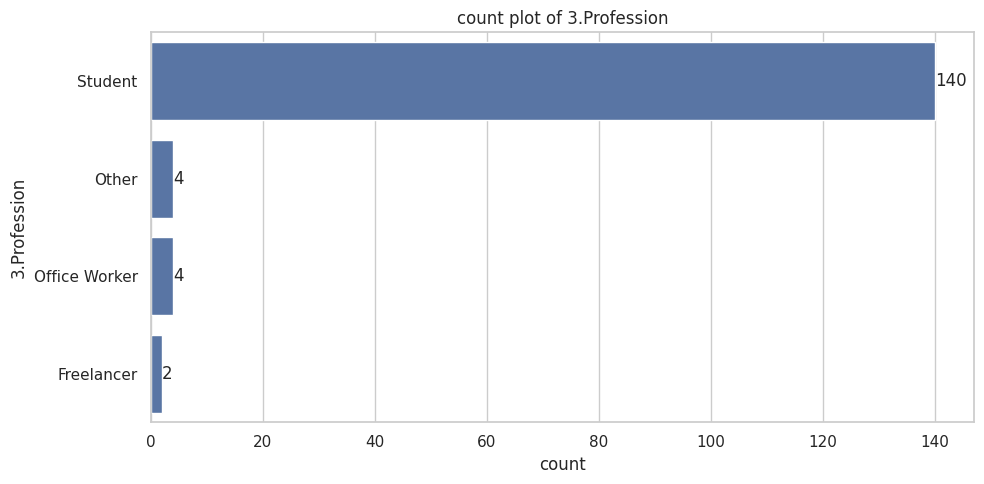

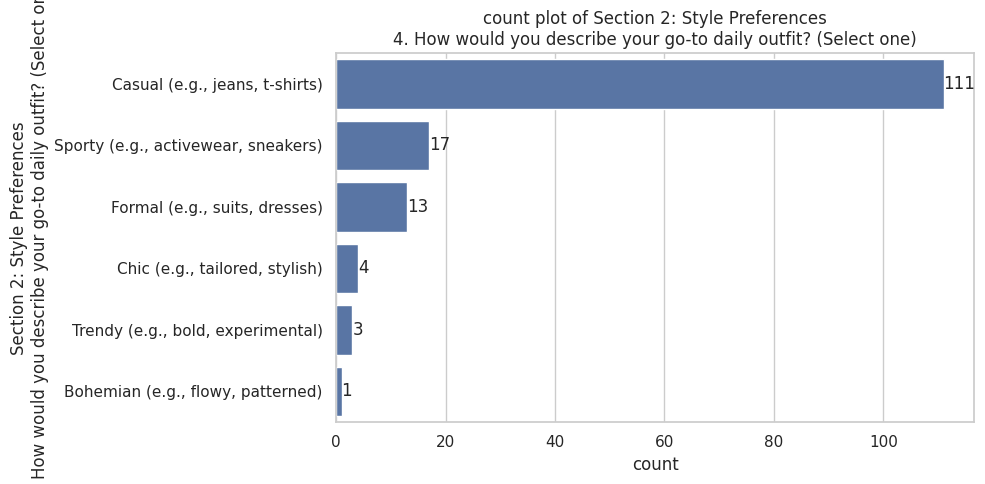

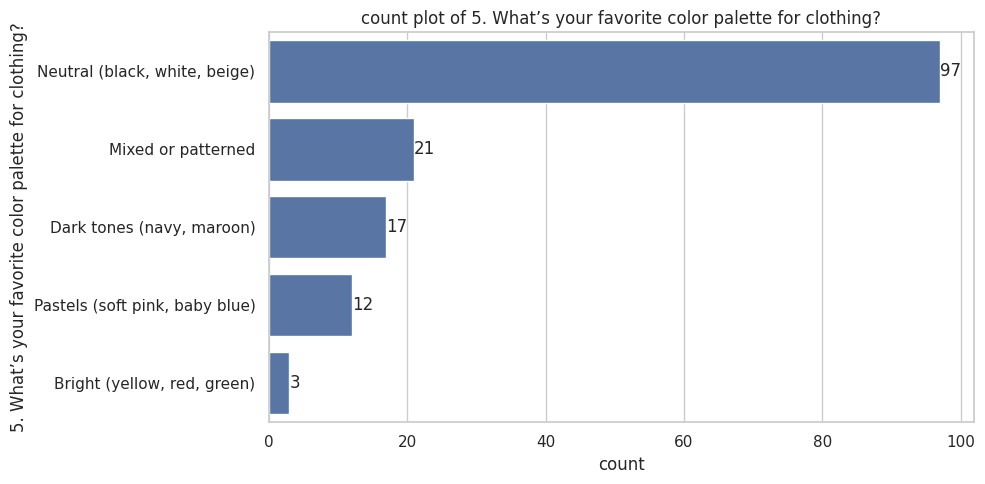

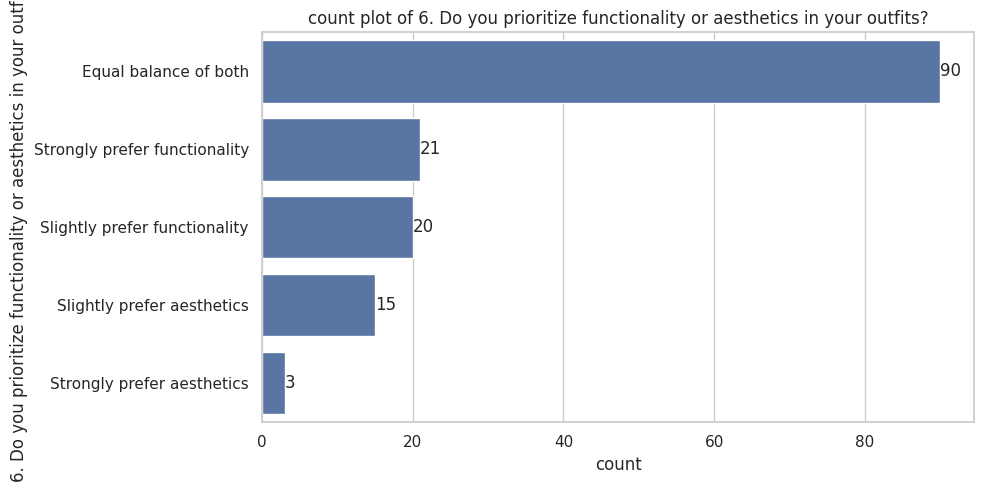

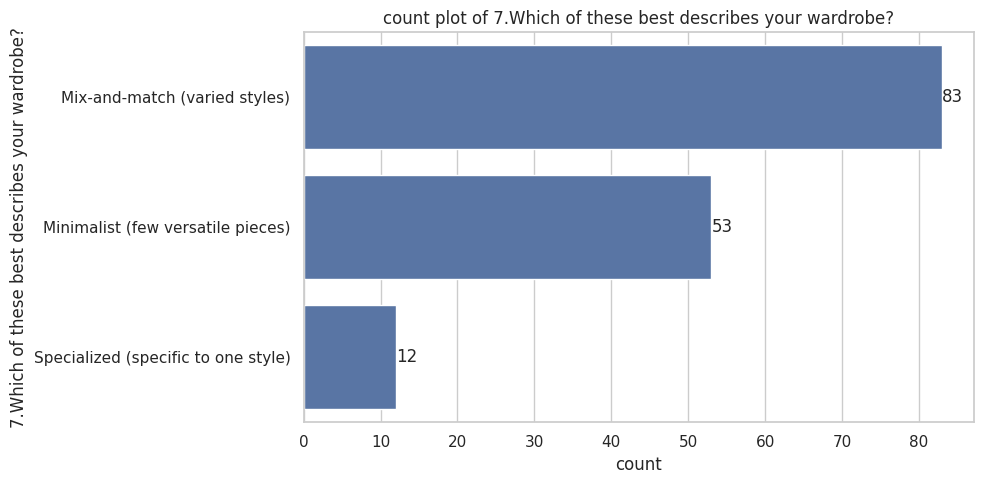

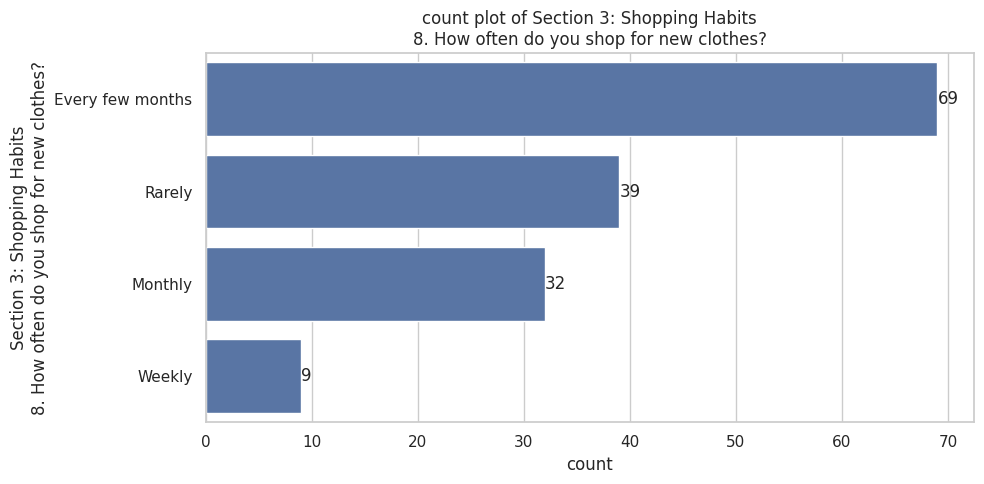

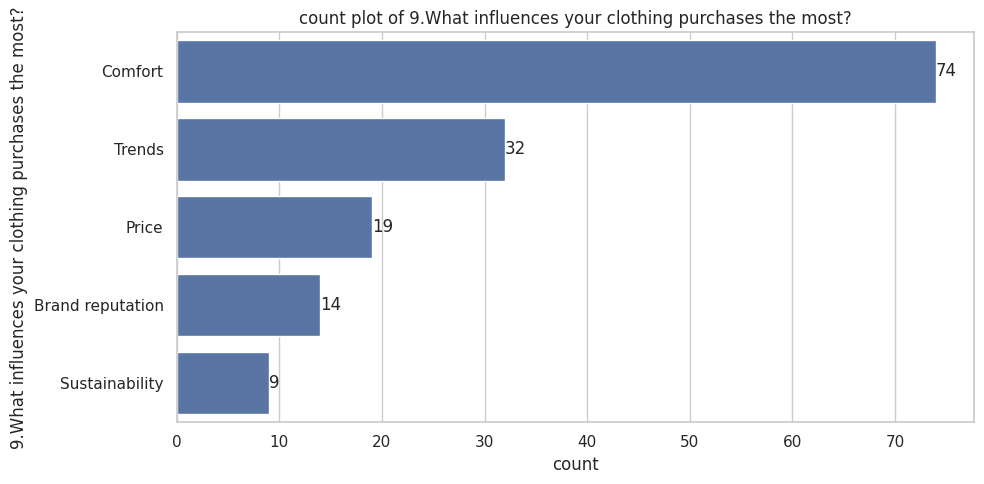

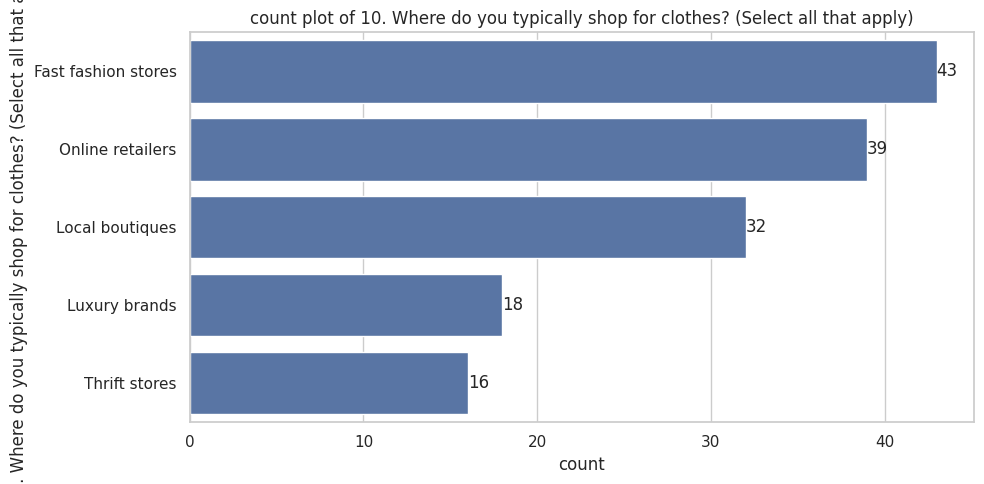

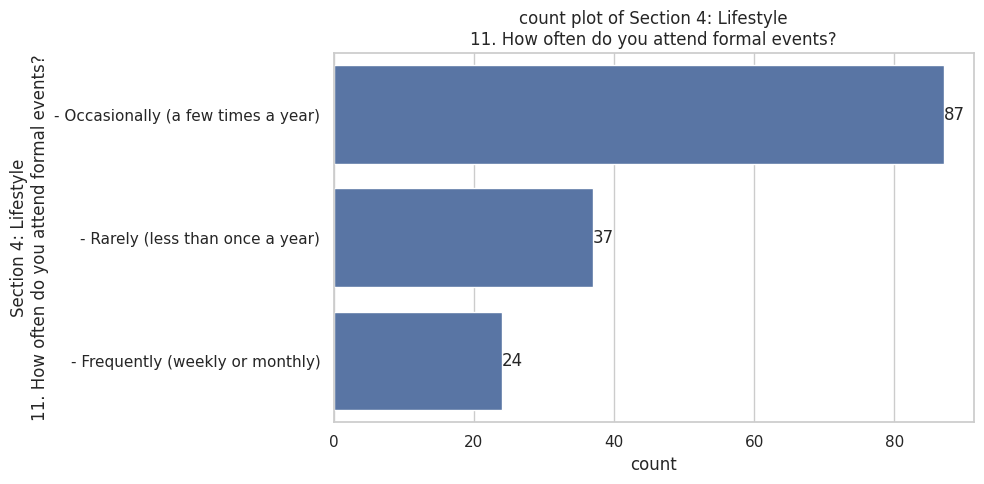

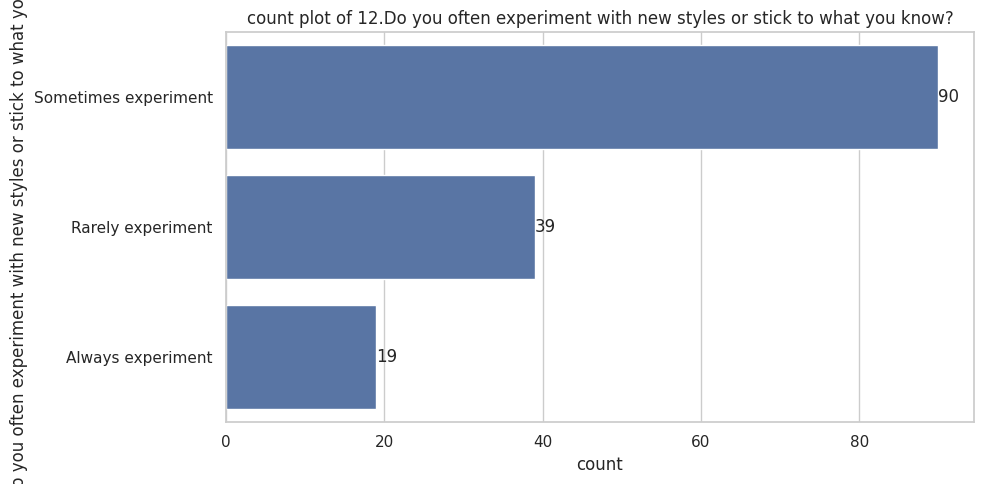

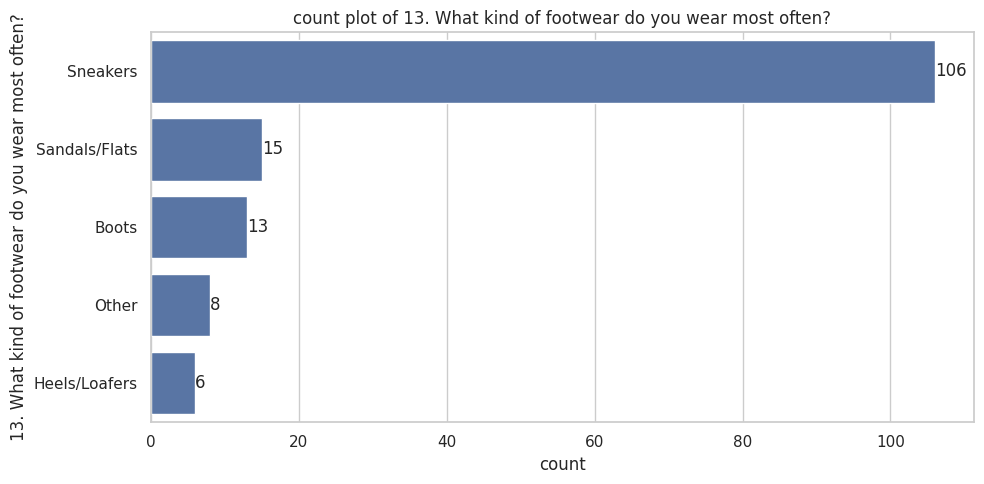

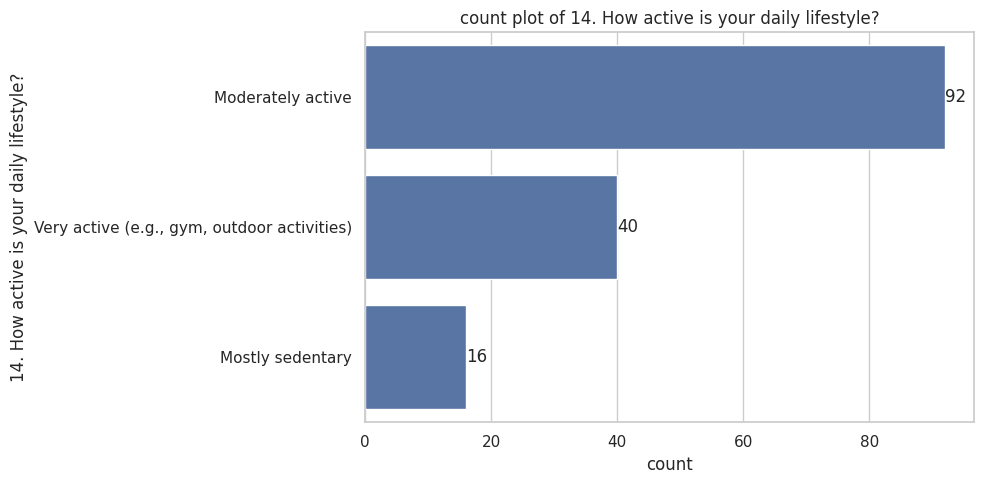

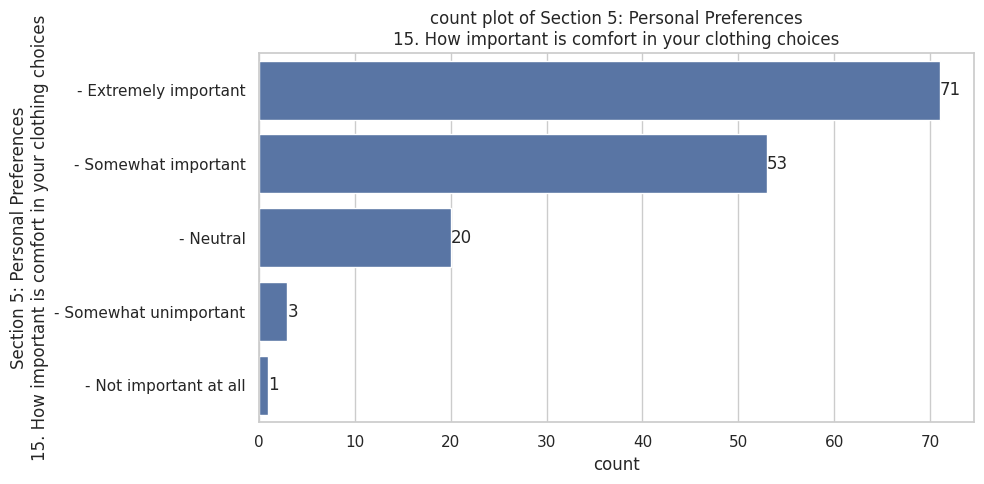

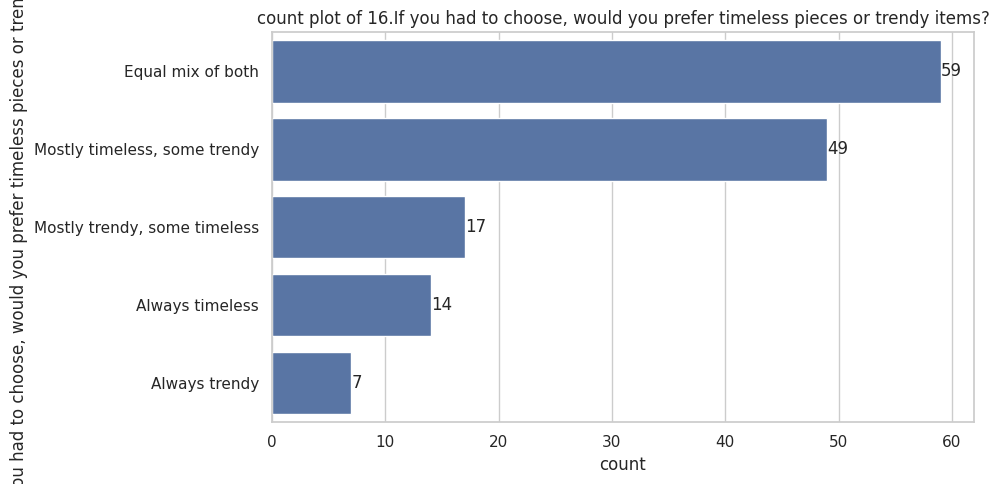

In [ ]:
for col in categorical:
  plt.figure(figsize = (10,5))
  ax = sns.countplot(y = col, data = df, order = df[col].value_counts().index)
  ax.bar_label(ax.containers[0])
  plt.title(f'count plot of {col}')
  plt.tight_layout()
  plt.show()

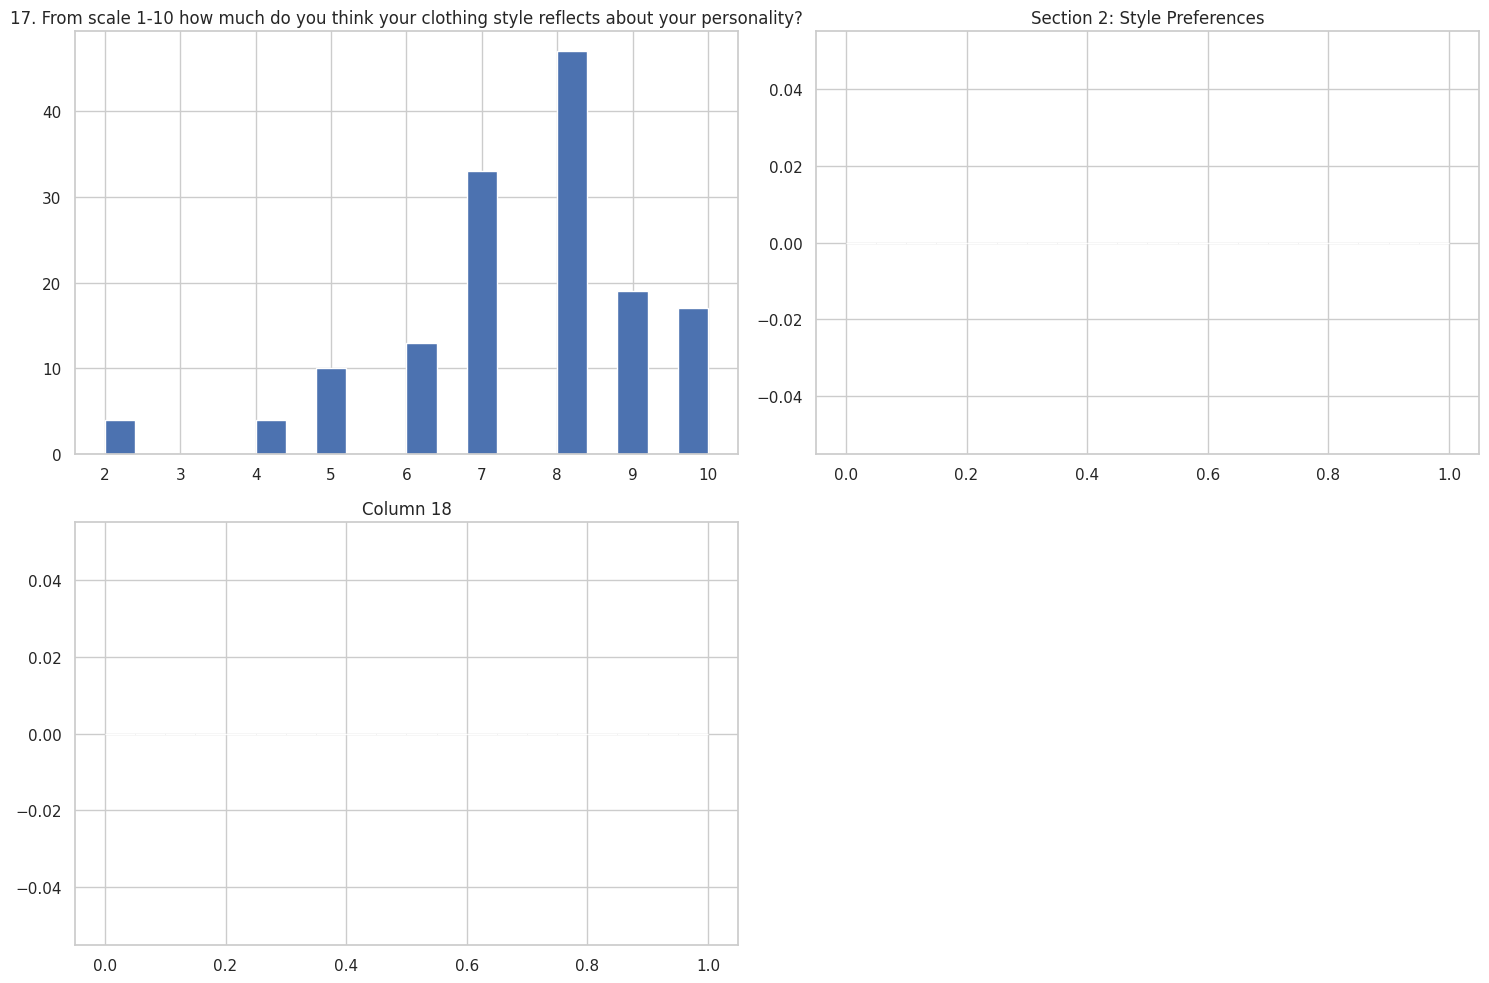

In [ ]:
if numerical.shape[1]>0:
  numerical.hist(figsize = (15,10),bins = 20)
  plt.tight_layout()
  plt.show()


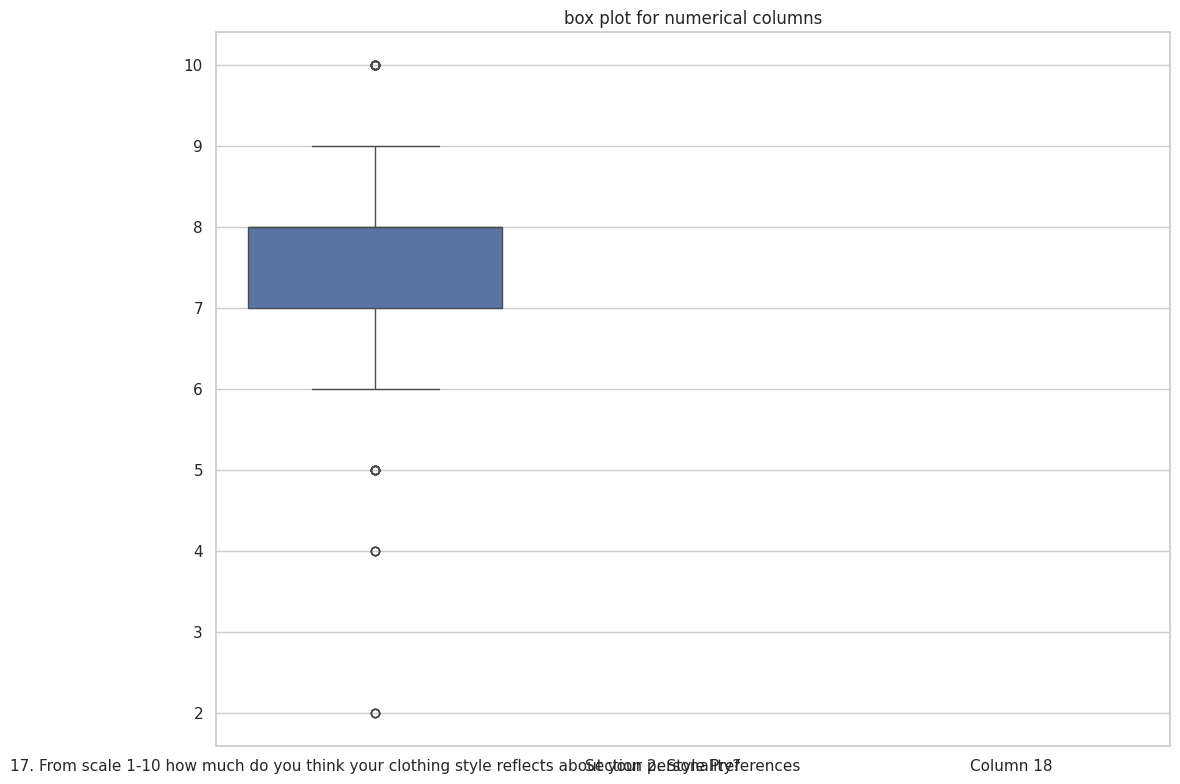

In [ ]:
if numerical.shape[1]>0:
  plt.figure(figsize= (12,8))
  sns.boxplot(data = numerical)
  plt.title("box plot for numerical columns")
  plt.tight_layout()
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                                                                                          Non-Null Count  Dtype         
---  ------                                                                                          --------------  -----         
 0   Timestamp                                                                                       150 non-null    datetime64[ns]
 1   1.Age Group                                                                                     150 non-null    object        
 2   2.Gender                                                                                        150 non-null    object        
 3   3.Profession                                                                                    150 non-null    object        
 4   Section 2: Style Preferences
4. How would you describe your go-to daily outfit? (Select one)    14

In [ ]:
target_column = '17. From scale 1-10 how much do you think your clothing style reflects about your personality?'
if target_column not in df.columns:
  raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")

In [ ]:
predicting_columns = ['1.Age Group','2.Gender','3.Profession']

In [ ]:
for col in predicting_columns:
  if col not in df.columns:
    raise ValueError(f"Predicting column '{col}' not found in the DataFrame.")

In [ ]:
df_model = df[predicting_columns + [target_column]]

In [ ]:
df_model.head()

1.Age Group 2.Gender 3.Profession  \
0       18–24   Female      Student   
1       18–24   Female      Student   
2       18–24   Female      Student   
3       18–24     Male      Student   
4       18–24     Male      Student   

   17. From scale 1-10 how much do you think your clothing style reflects about your personality?  
0                                                8.0                                               
1                                                6.0                                               
2                                                9.0                                               
3                                                6.0                                               
4                                                6.0

In [ ]:
df_model = pd.get_dummies(df_model, drop_first = True)

In [ ]:
df_model.head()

17. From scale 1-10 how much do you think your clothing style reflects about your personality?  \
0                                                8.0                                                
1                                                6.0                                                
2                                                9.0                                                
3                                                6.0                                                
4                                                6.0                                                

   1.Age Group_25–34  1.Age Group_35–44  1.Age Group_45+  \
0              False              False            False   
1              False              False            False   
2              False              False            False   
3              False              False            False   
4              False              False            False   

   1.Age Group_Under 18  2.Gender_Male  3.Profession_Office Worker  \
0                 False          False                       False   
1                 False          False                       False   
2                 False          False                       False   
3                 False           True                       False   
4                 False           True                       False   

   3.Profession_Other  3.Profession_Student  
0               False                  True  
1               False                  True  
2               False                  True  
3               False                  True  
4               False                  True

In [ ]:
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})

In [ ]:
df_model.head()

17. From scale 1-10 how much do you think your clothing style reflects about your personality?  \
0                                                8.0                                                
1                                                6.0                                                
2                                                9.0                                                
3                                                6.0                                                
4                                                6.0                                                

   1.Age Group_25–34  1.Age Group_35–44  1.Age Group_45+  \
0                  0                  0                0   
1                  0                  0                0   
2                  0                  0                0   
3                  0                  0                0   
4                  0                  0                0   

   1.Age Group_Under 18  2.Gender_Male  3.Profession_Office Worker  \
0                     0              0                           0   
1                     0              0                           0   
2                     0              0                           0   
3                     0              1                           0   
4                     0              1                           0   

   3.Profession_Other  3.Profession_Student  
0                   0                     1  
1                   0                     1  
2                   0                     1  
3                   0                     1  
4                   0                     1

In [ ]:
X = df_model.drop(target_column, axis = 1)
y = df_model[target_column]

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
# Find indices of rows with NaN in y_train and drop them from both X_train and y_train
nan_indices_train = y_train[y_train.isna()].index
X_train = X_train.drop(nan_indices_train)
y_train = y_train.drop(nan_indices_train)

# Find indices of rows with NaN in y_test and drop them from both X_test and y_test
nan_indices_test = y_test[y_test.isna()].index
X_test = X_test.drop(nan_indices_test)
y_test = y_test.drop(nan_indices_test)

clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {acc}')

Accuracy of the model is 0.41379310344827586


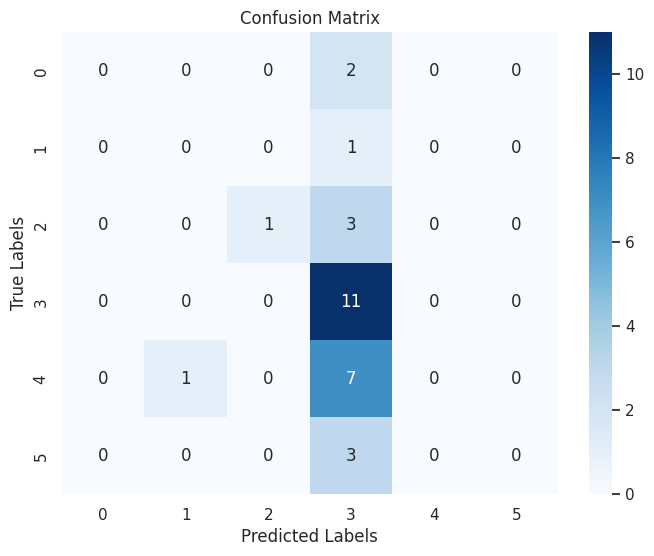

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

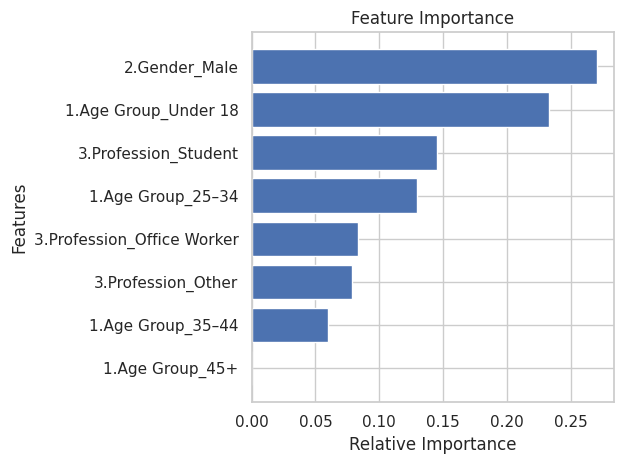

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Accuracy of the model is 0.5


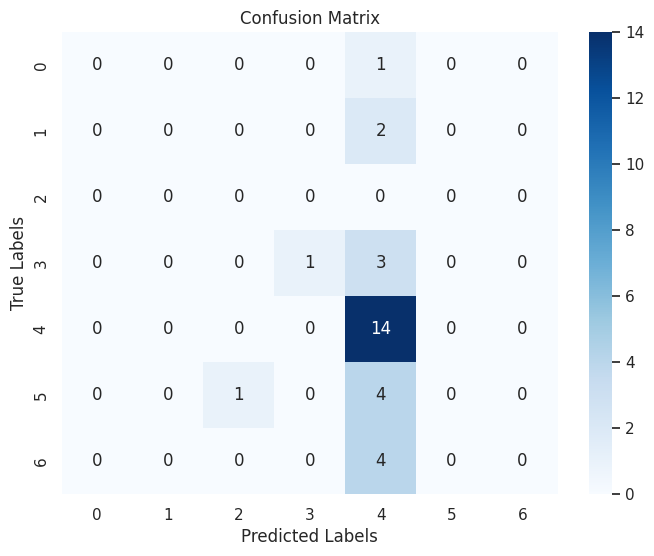

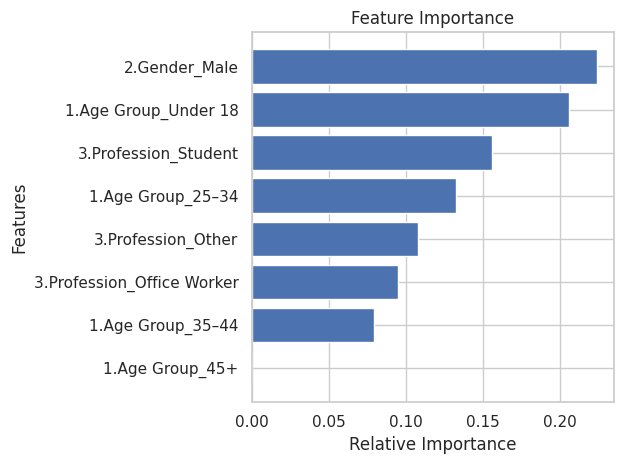

In [ ]:
predicting_columns = ['1.Age Group','2.Gender','3.Profession']
target_column = '17. From scale 1-10 how much do you think your clothing style reflects about your personality?'
df_model = df[predicting_columns + [target_column]]
df_model = pd.get_dummies(df_model, drop_first = True)
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})
X = df_model.drop(target_column, axis = 1)
y = df_model[target_column]

# Drop rows with NaN values in the target variable
nan_indices = y[y.isna()].index
X = X.drop(nan_indices)
y = y.drop(nan_indices)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {acc}')


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Timestamp', '1.Age Group', '2.Gender', '3.Profession',
       'Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)',
       '5. What’s your favorite color palette for clothing?',
       '6. Do you prioritize functionality or aesthetics in your outfits?',
       '7.Which of these best describes your wardrobe?',
       'Section 3: Shopping Habits\n8. How often do you shop for new clothes?',
       '9.What influences your clothing purchases the most?',
       '10. Where do you typically shop for clothes? (Select all that apply)',
       'Section 4: Lifestyle\n11. How often do you attend formal events?',
       '12.Do you often experiment with new styles or stick to what you know?',
       '13. What kind of footwear do you wear most often?',
       '14. How active is your daily lifestyle?',
       'Section 5: Personal Preferences\n15. How important is comfort in your clothing choices',
       '16.If you had to choose, would you prefer timel

In [ ]:
df['5. What’s your favorite color palette for clothing?'].unique()

array(['Pastels (soft pink, baby blue)', 'Dark tones (navy, maroon)',
       'Neutral (black, white, beige)', 'Mixed or patterned',
       'Bright (yellow, red, green)'], dtype=object)

Accuracy of the model is 0.4


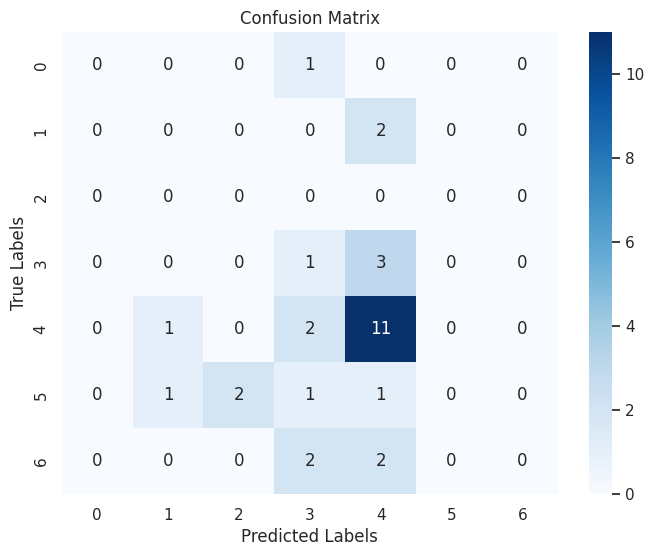

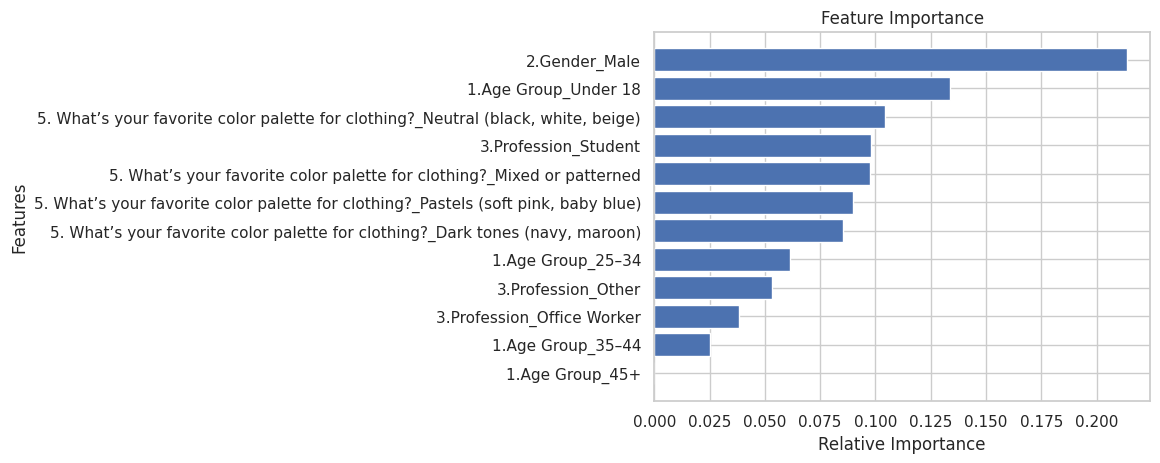

In [ ]:
predicting_columns = ['1.Age Group','2.Gender','3.Profession', '5. What’s your favorite color palette for clothing?']
target_column = '17. From scale 1-10 how much do you think your clothing style reflects about your personality?'
df_model = df[predicting_columns + [target_column]]
df_model = pd.get_dummies(df_model, drop_first = True)
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})
X = df_model.drop(target_column, axis = 1)
y = df_model[target_column]

# Drop rows with NaN values in the target variable
nan_indices = y[y.isna()].index
X = X.drop(nan_indices)
y = y.drop(nan_indices)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {acc}')


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Another Fashion DataSet

In [ ]:
df = pd.read_excel('fashion_data_2018_2022.xls')

In [ ]:
df.head()

product_id    product_name  gender category     pattern  color age_group  \
0        1001    Biker Jacket    Male    Shirt   Geometric  White     25-35   
1        1002  Business Shirt    Male   Jacket  Polka Dots  Beige     18-24   
2        1003     Wool Jacket  Female    Dress   Geometric  Brown     18-24   
3        1004    Summer Dress    Male   Shorts       Plain  White     25-35   
4        1005    Casual Jeans    Male    Shirt       Plain  Beige     35-45   

   season   price   material  sales_count  reviews_count  average_rating  \
0  Spring   70.36  Synthetic           75             65             4.9   
1  Summer   91.59       Wool          296             25             3.5   
2     All  129.52       Wool           50             32             4.3   
3     All  116.01     Cotton          435             73             4.6   
4  Winter  125.48    Viscose           79             36             3.6   

   out_of_stock_times brand  discount last_stock_date  wish_list_count  \
0                   3  ZARA      0.20      2018-01-28              211   
1                   6  ZARA      0.00      2018-01-28              211   
2                   4  ZARA      0.05      2018-01-07               64   
3                   3  ZARA      0.10      2018-01-01              171   
4                   4  ZARA      0.00      2018-01-28              126   

   month_of_sale  year_of_sale  
0              1          2018  
1              1          2018  
2              1          2018  
3              1          2018  
4              1          2018

In [ ]:
df.isnull().sum()

product_id            0
product_name          0
gender                0
category              0
pattern               0
color                 0
age_group             0
season                0
price                 0
material              0
sales_count           0
reviews_count         0
average_rating        0
out_of_stock_times    0
brand                 0
discount              0
last_stock_date       0
wish_list_count       0
month_of_sale         0
year_of_sale          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          660 non-null    int64         
 1   product_name        660 non-null    object        
 2   gender              660 non-null    object        
 3   category            660 non-null    object        
 4   pattern             660 non-null    object        
 5   color               660 non-null    object        
 6   age_group           660 non-null    object        
 7   season              660 non-null    object        
 8   price               660 non-null    float64       
 9   material            660 non-null    object        
 10  sales_count         660 non-null    int64         
 11  reviews_count       660 non-null    int64         
 12  average_rating      660 non-null    float64       
 13  out_of_stock_times  660 non-null    int64         

In [ ]:
categorical  = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(exclude = ['object', 'datetime64[ns]'])

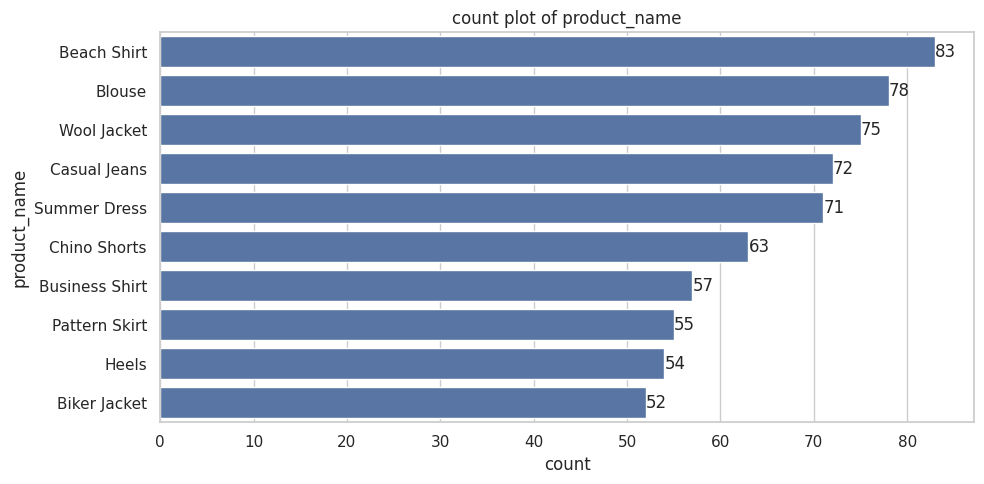

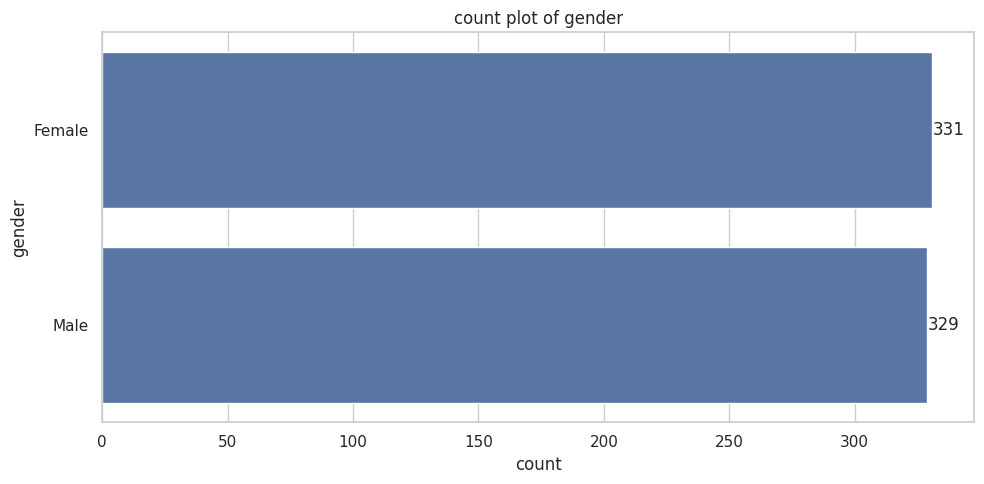

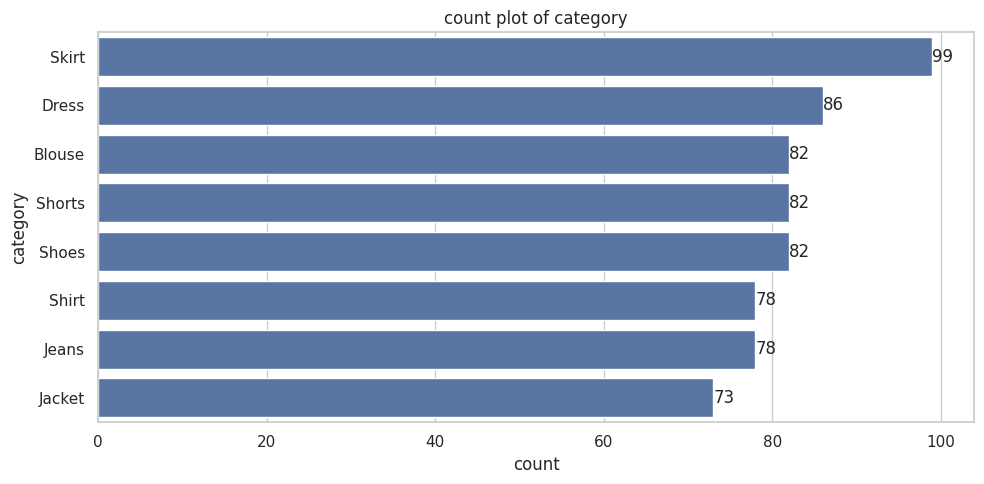

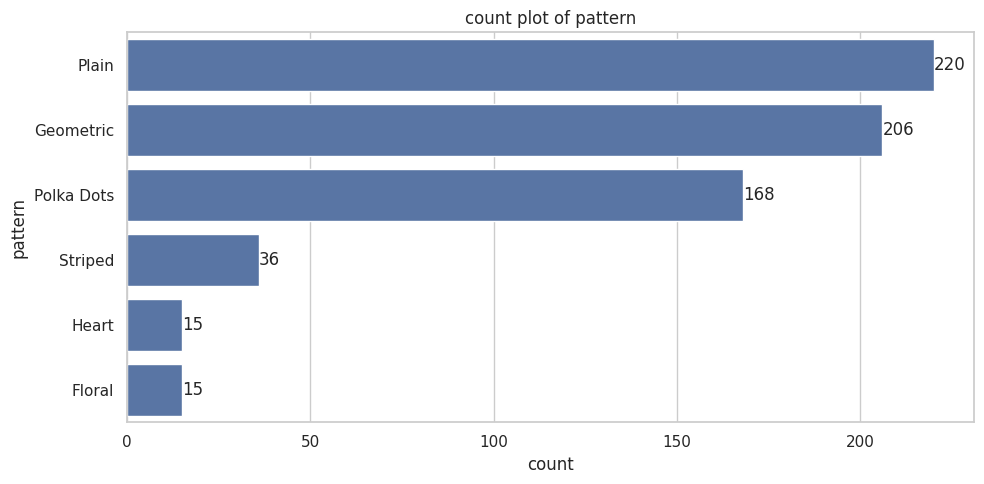

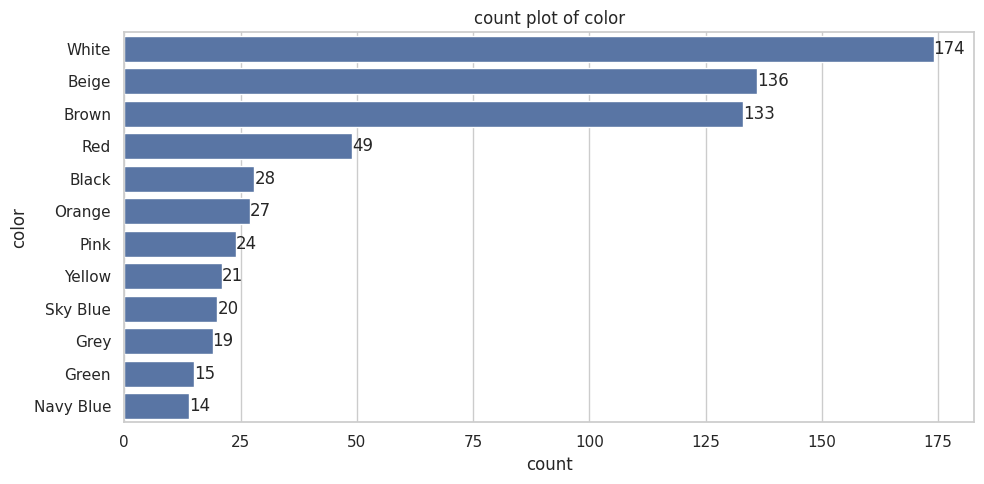

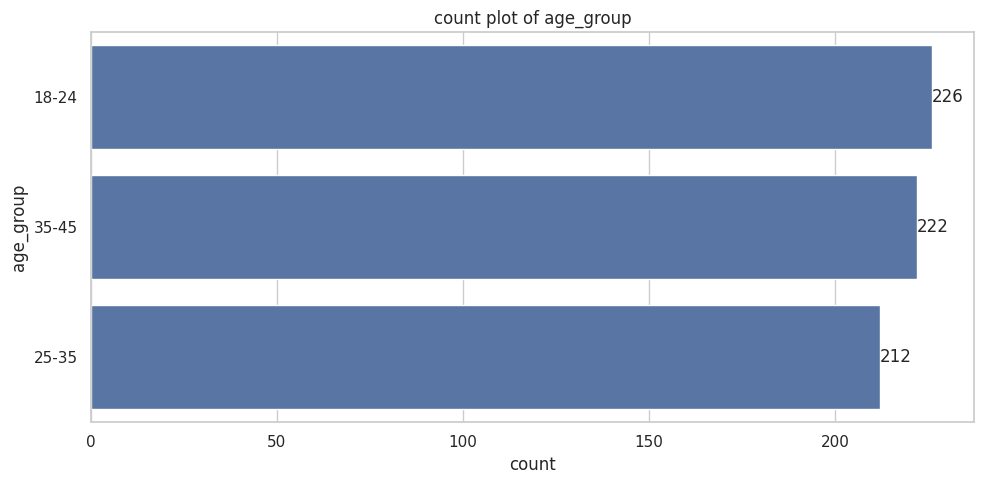

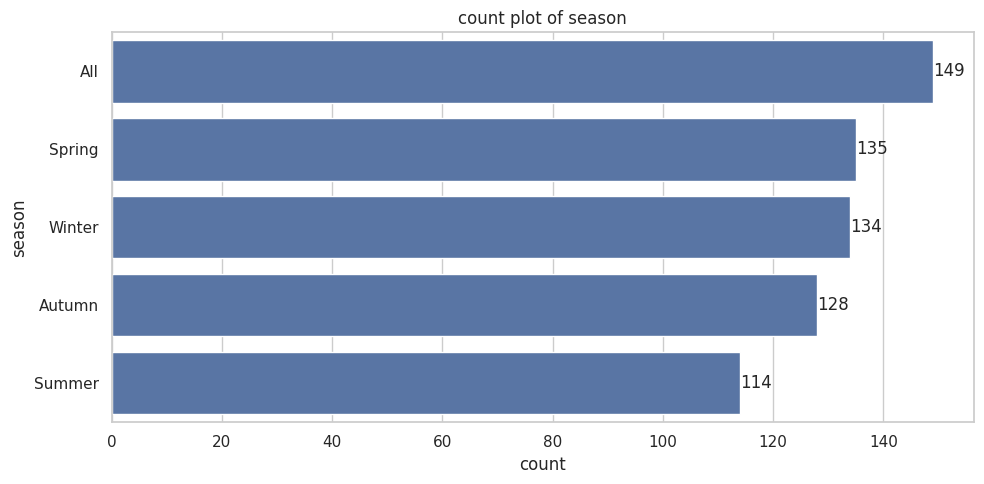

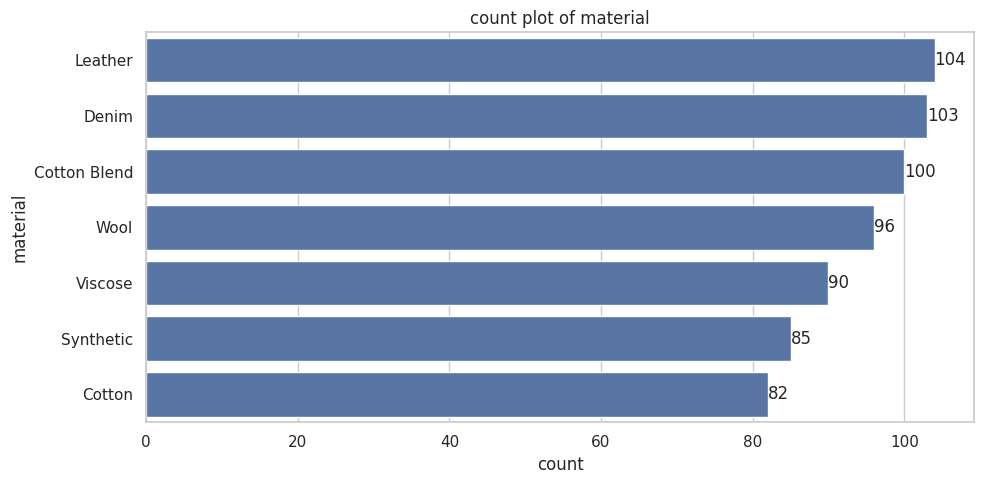

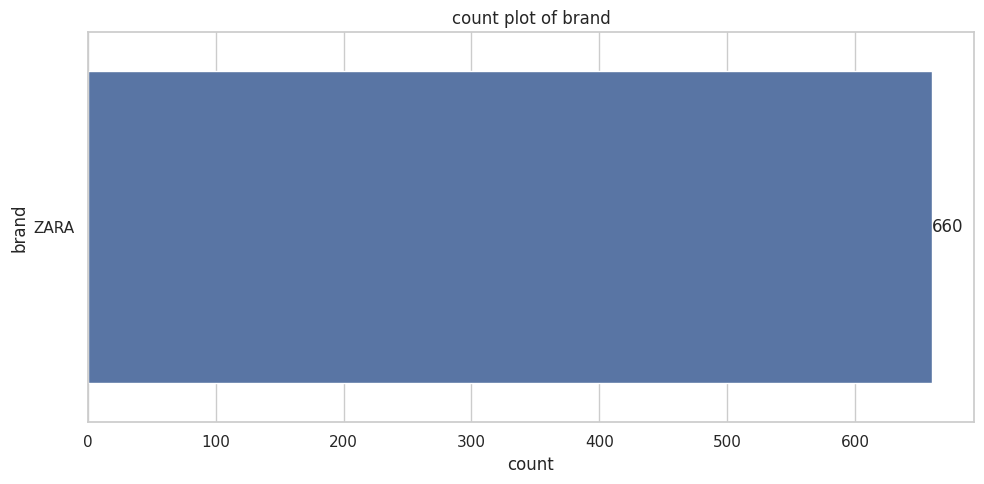

In [ ]:
# plot the count plot for categorical columns
for col in categorical:
  plt.figure(figsize = (10,5))
  ax = sns.countplot(y = col, data = df, order = df[col].value_counts().index)
  ax.bar_label(ax.containers[0])
  plt.title(f'count plot of {col}')
  plt.tight_layout()
  plt.show()

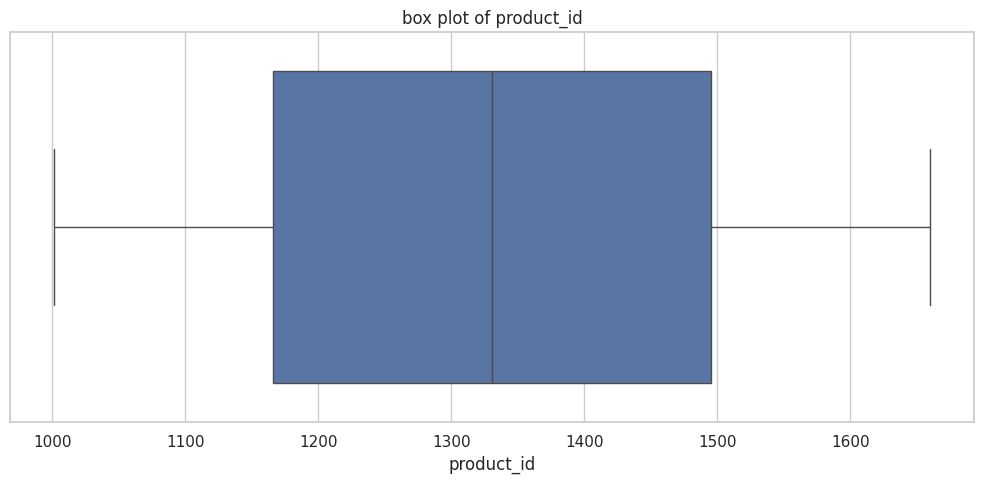

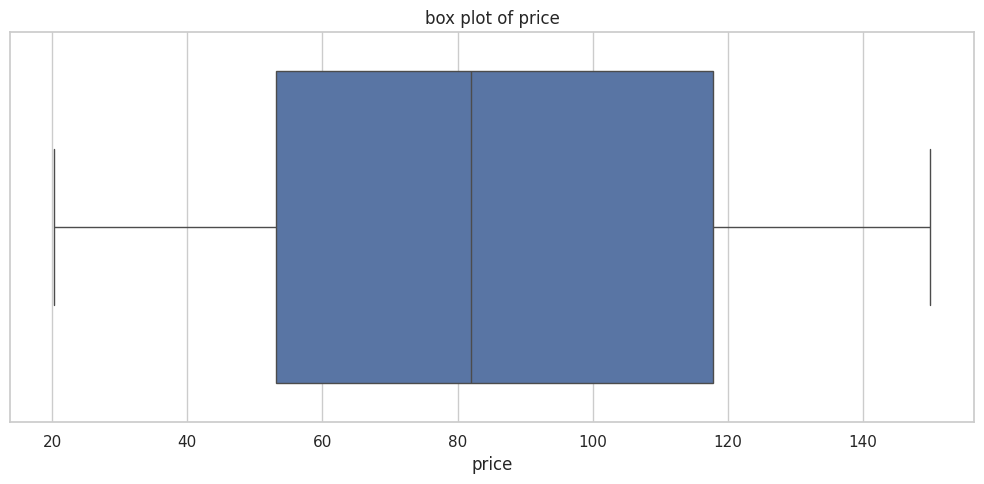

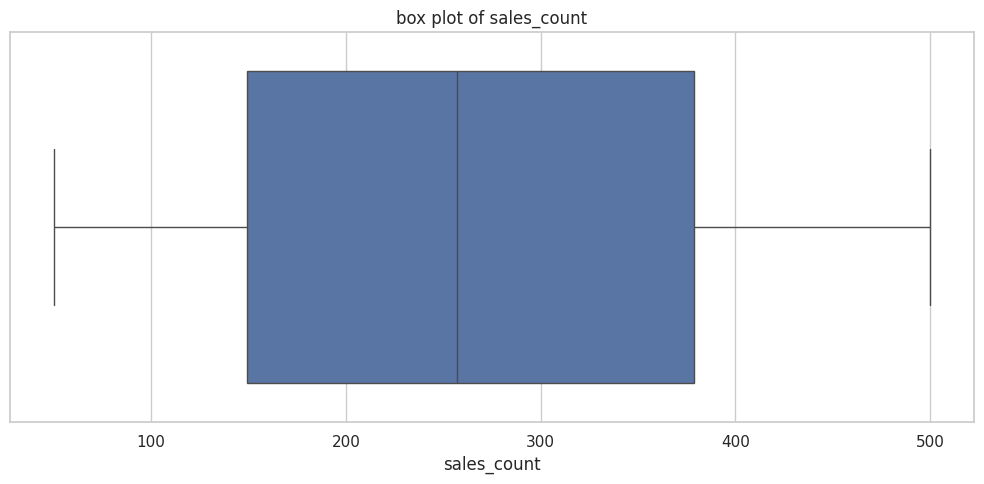

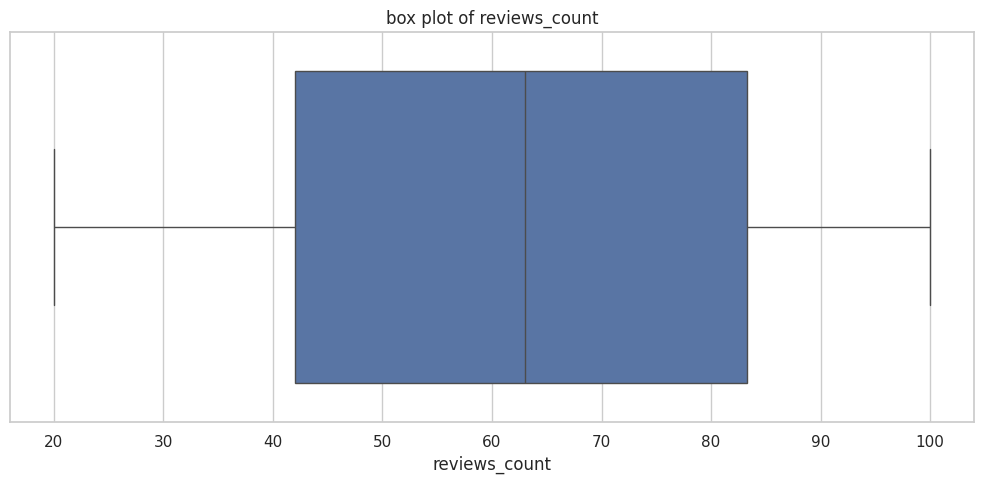

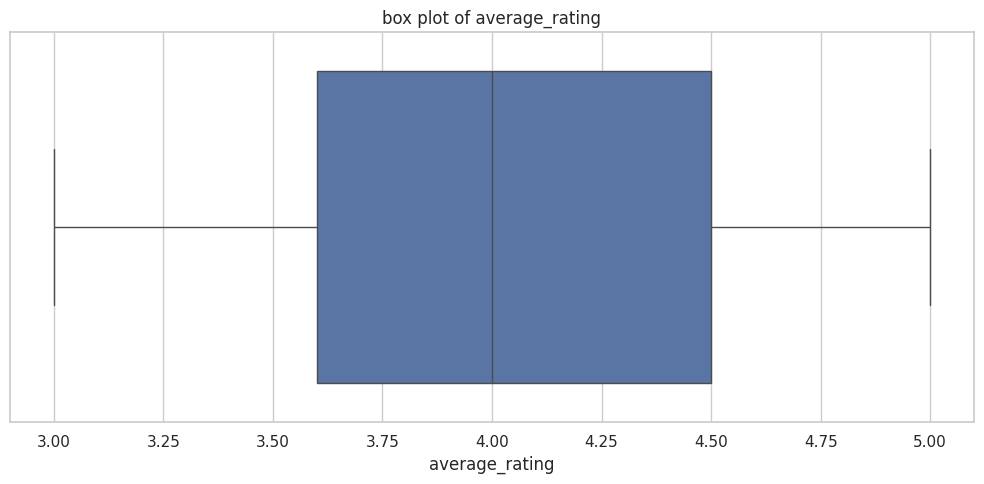

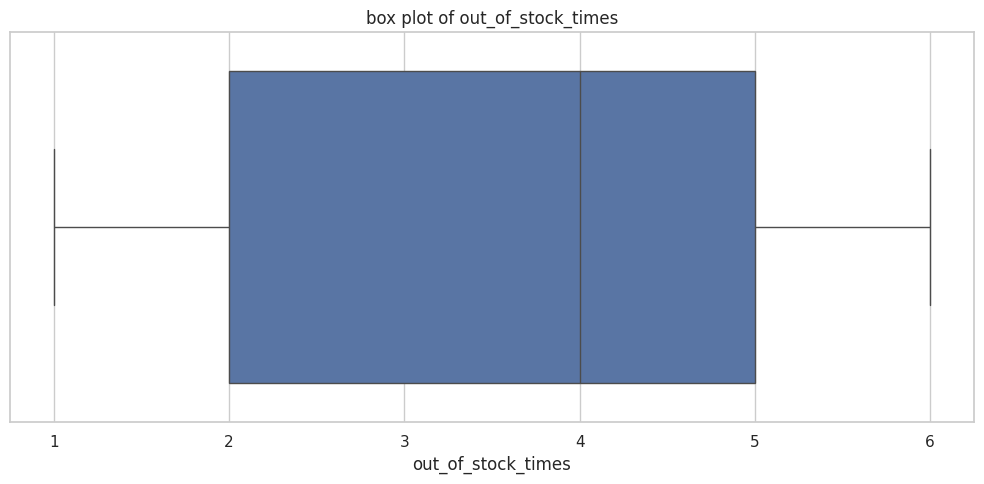

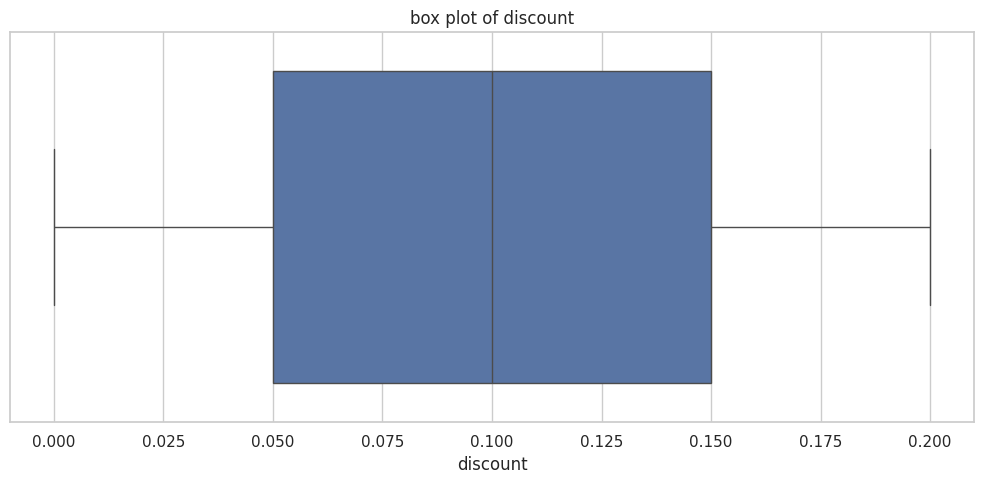

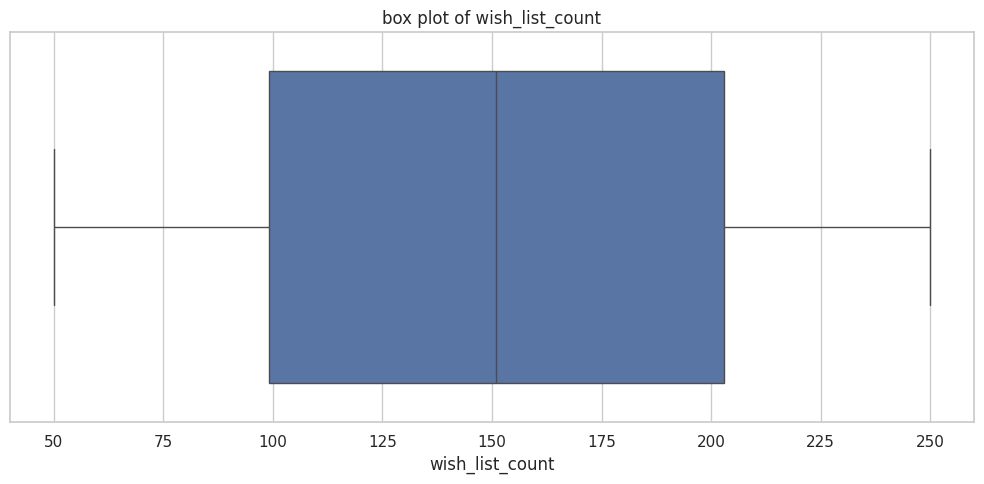

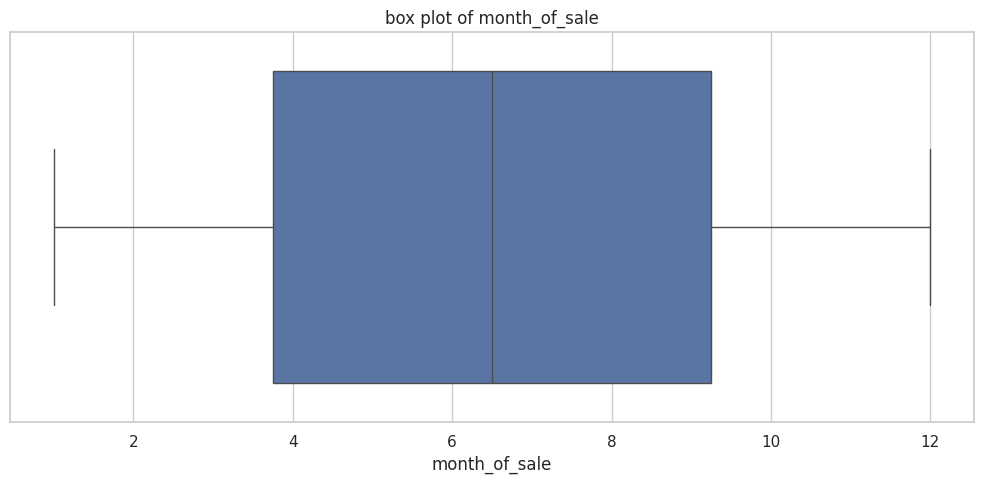

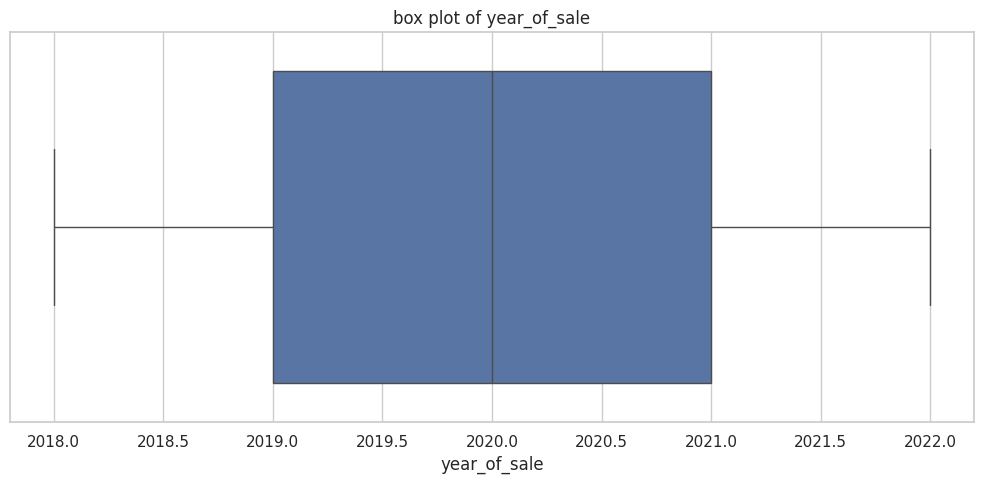

In [ ]:
#boxplot for numerical columns
for col in numerical:
  plt.figure(figsize = (10,5))
  sns.boxplot(x = df[col])
  plt.title(f'box plot of {col}')
  plt.tight_layout()
  plt.show()

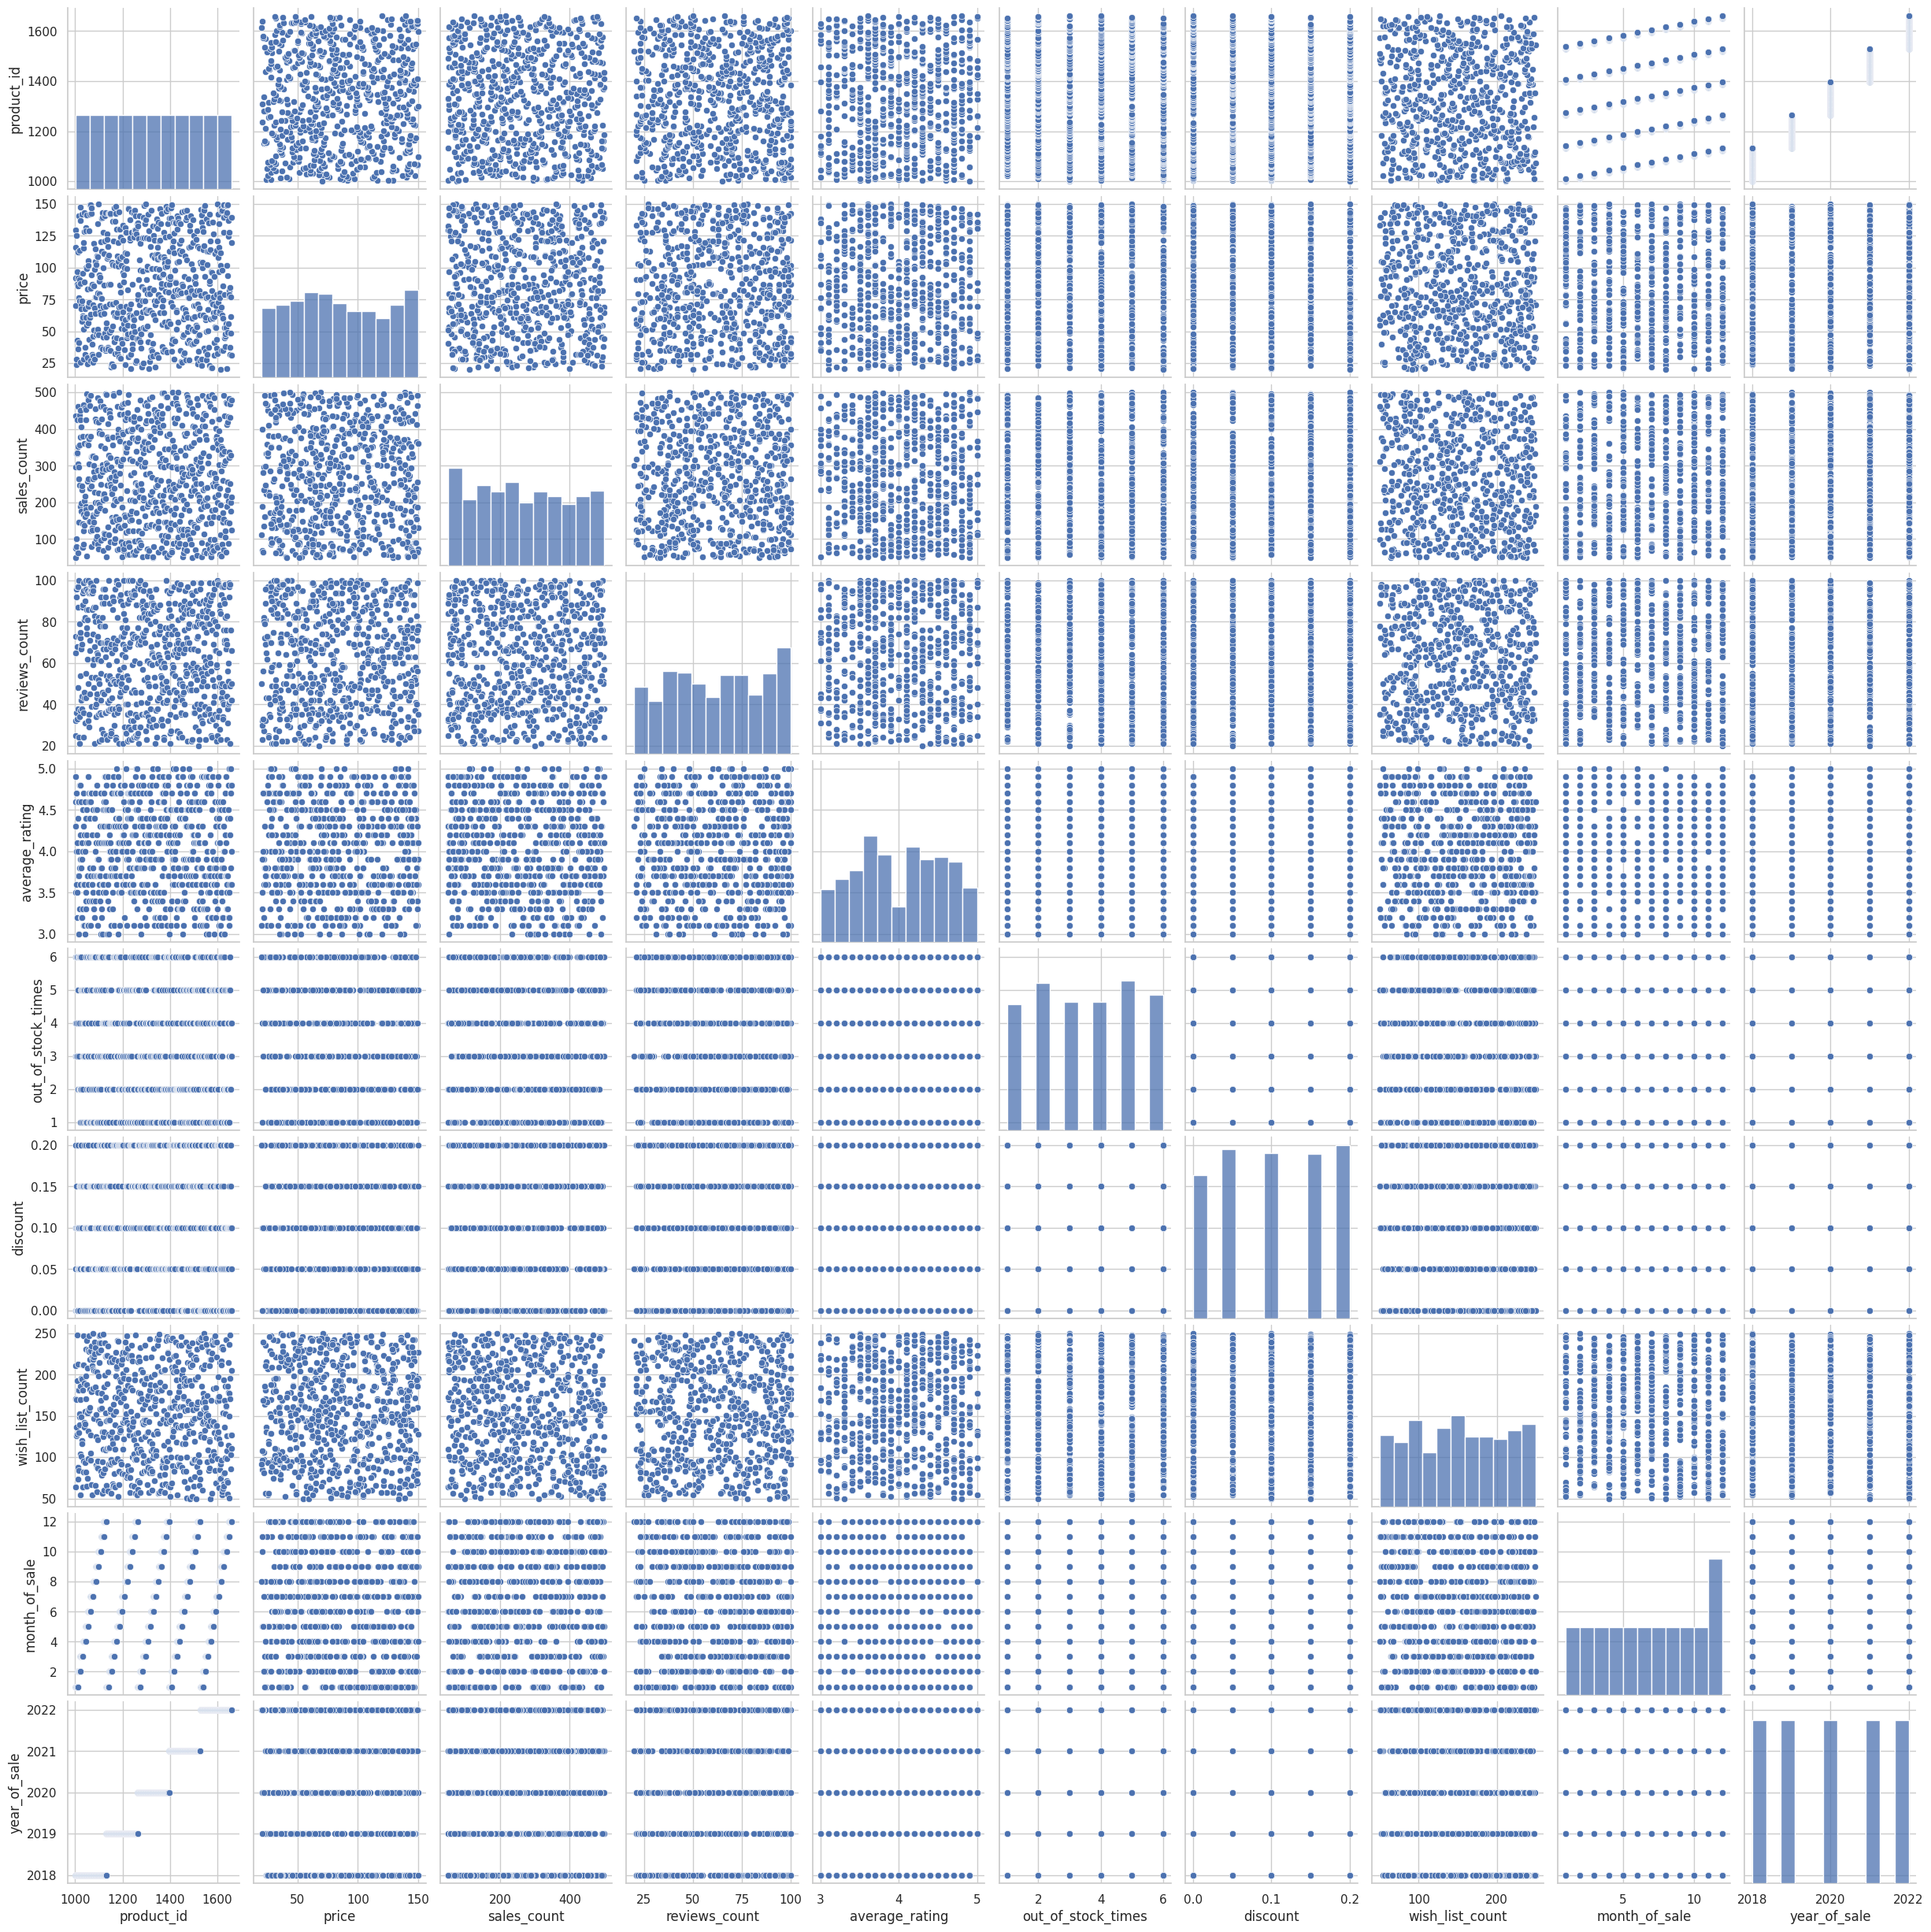

In [ ]:
#pair plot for numerical columns
sns.pairplot(numerical)
plt.show()

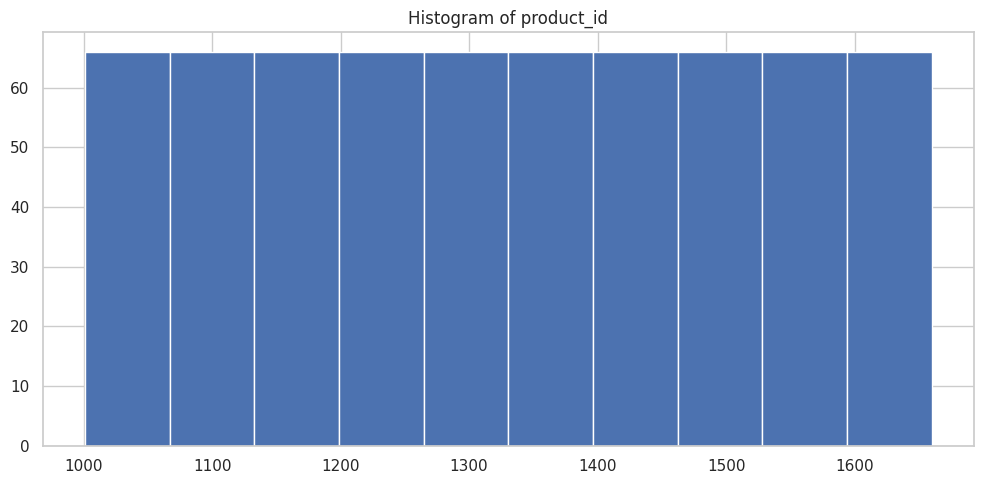

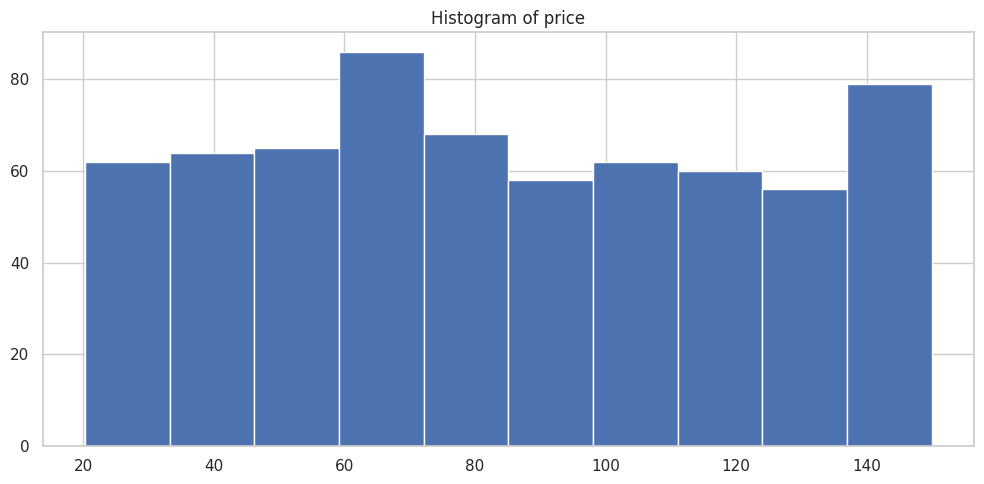

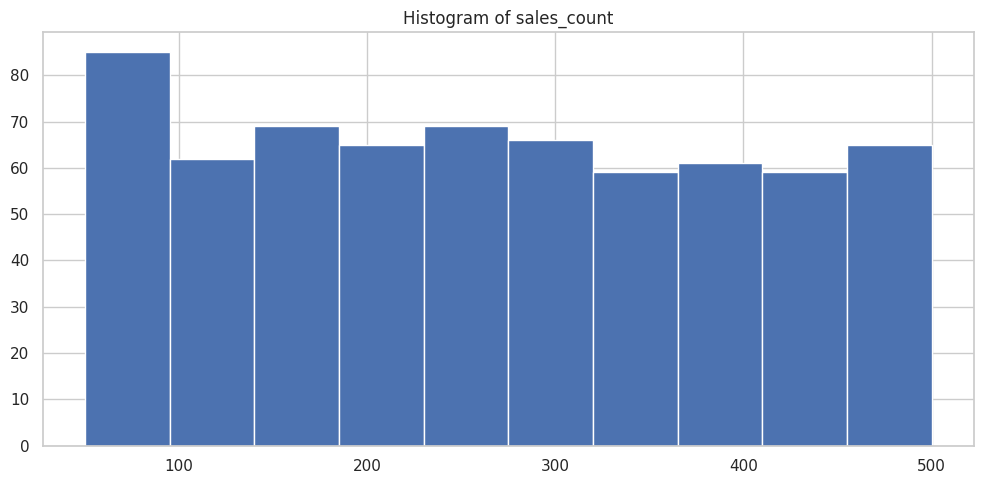

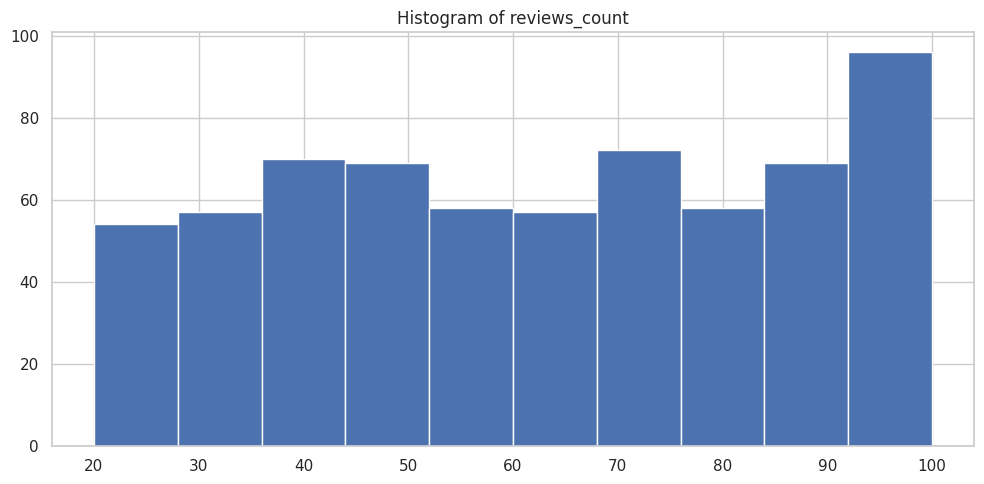

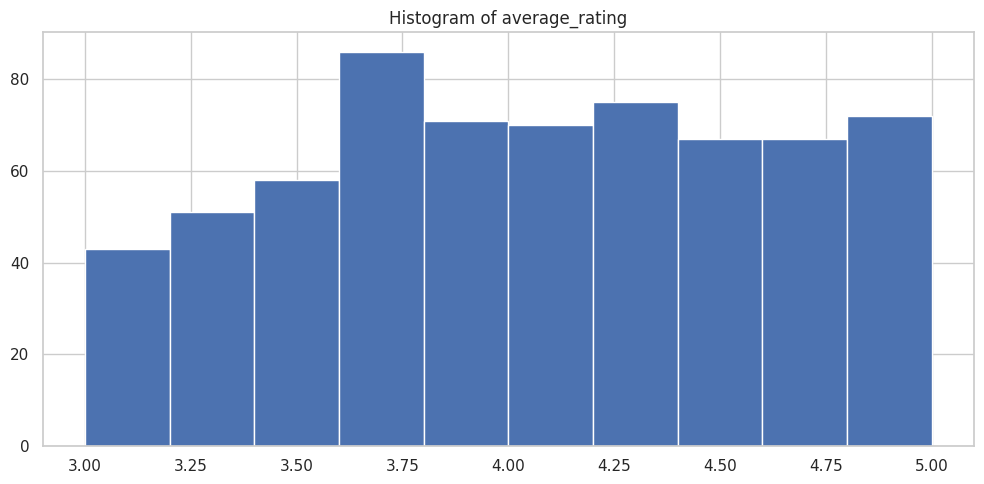

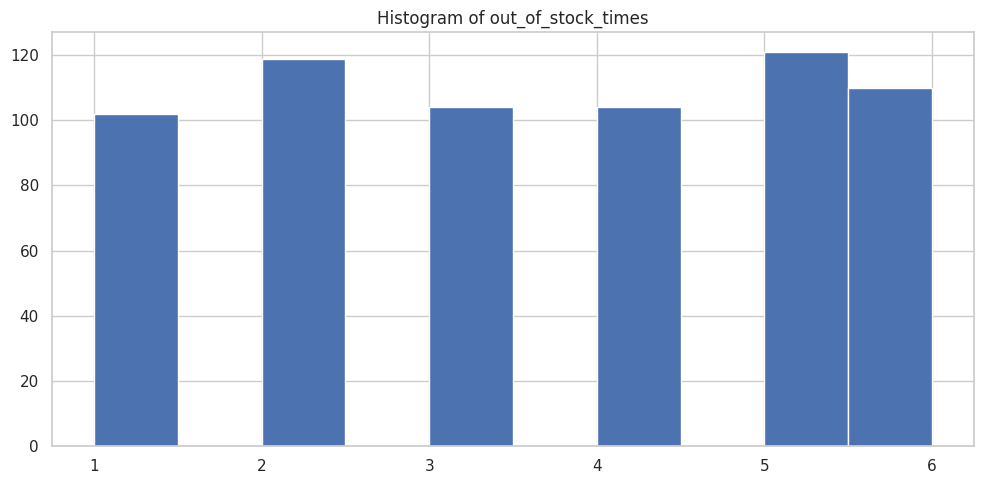

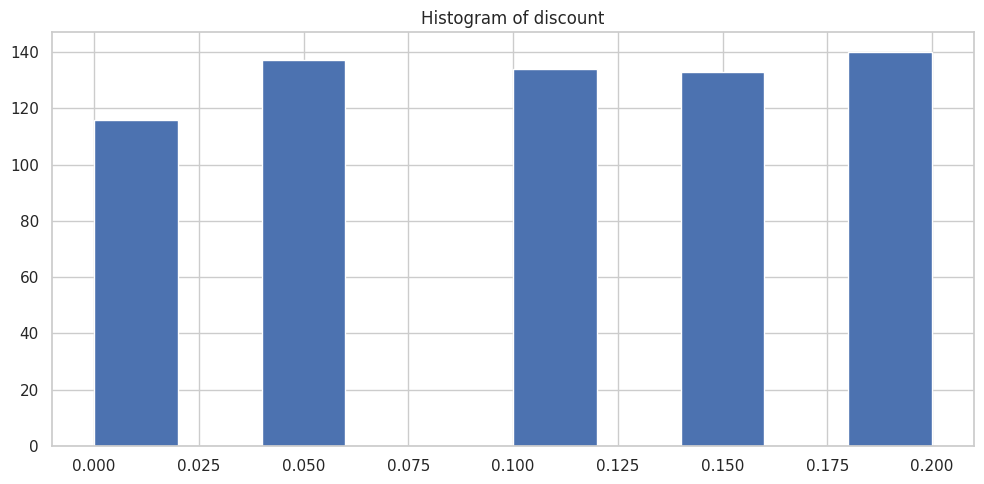

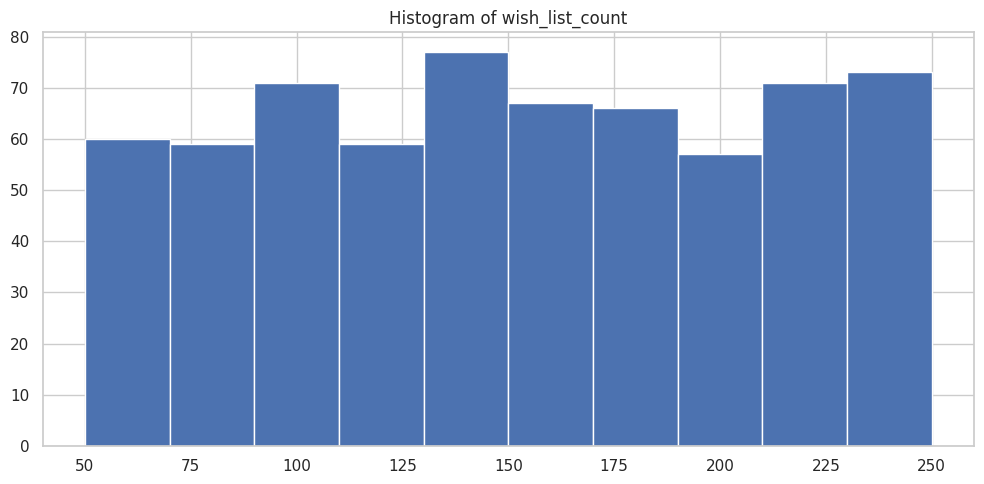

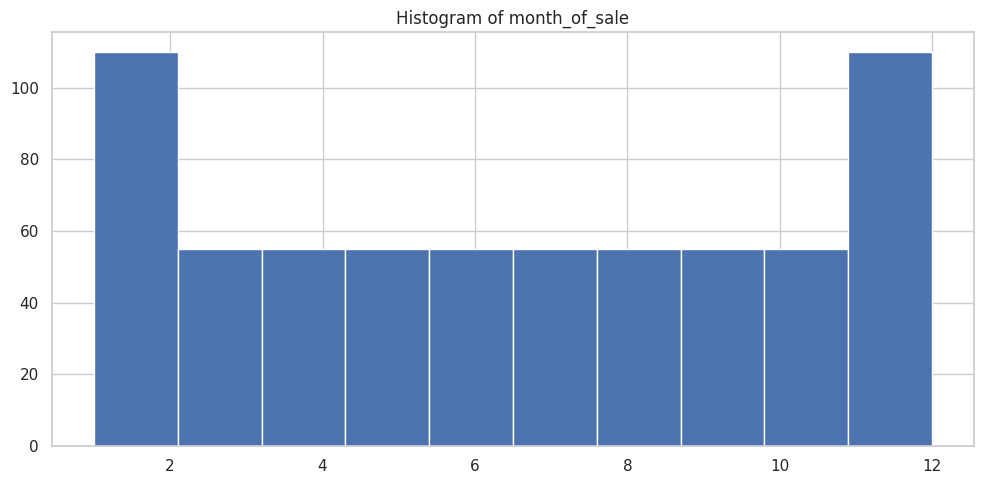

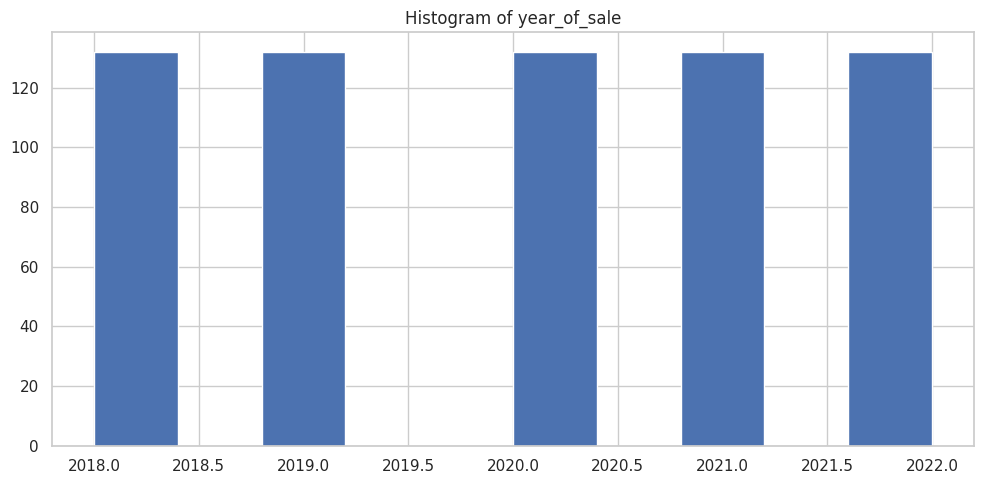

In [ ]:
#histograms for the numerical data
for col in numerical:
  plt.figure(figsize = (10,5))
  df[col].hist()
  plt.title(f'Histogram of {col}')
  plt.tight_layout()
  plt.show()

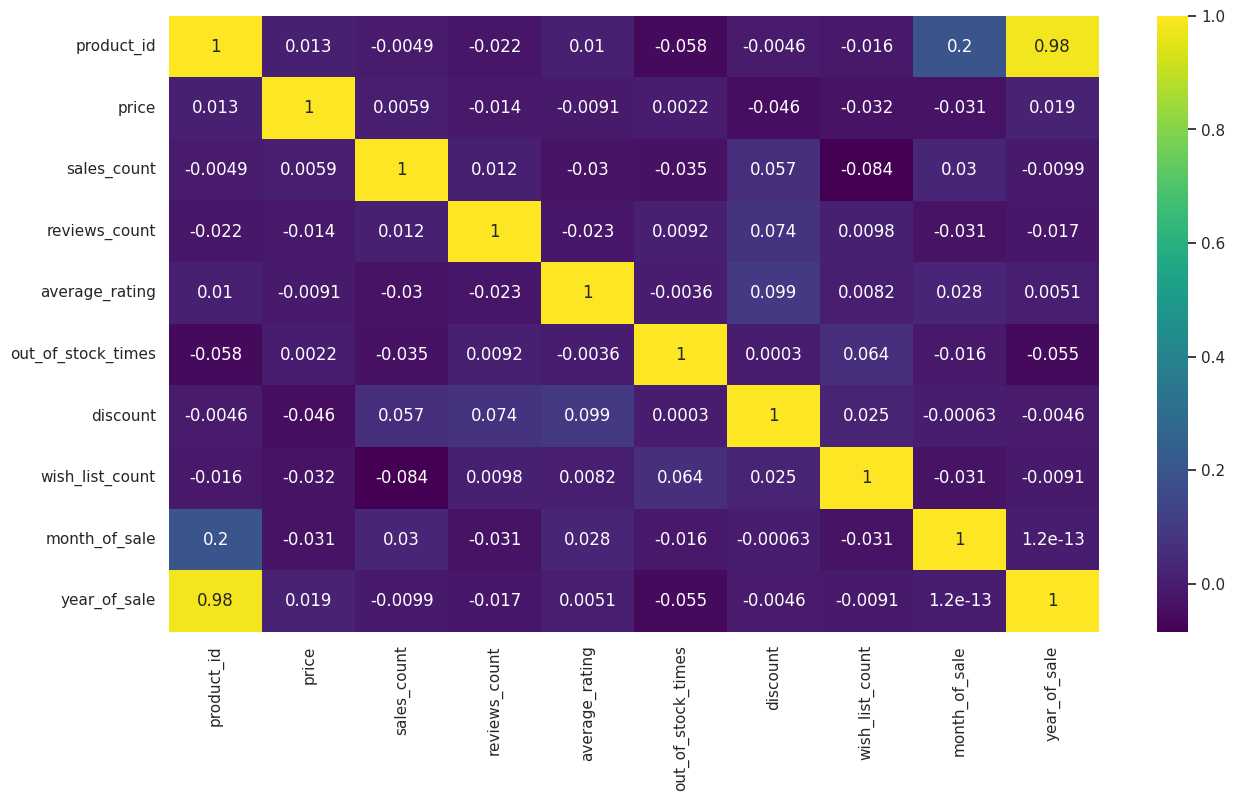

In [ ]:
#heatmap for numerical columns
plt.figure(figsize = (15,8))
sns.heatmap(numerical.corr(), annot = True,cmap='viridis')
plt.show()

In [ ]:
df.columns

Index(['product_id', 'product_name', 'gender', 'category', 'pattern', 'color',
       'age_group', 'season', 'price', 'material', 'sales_count',
       'reviews_count', 'average_rating', 'out_of_stock_times', 'brand',
       'discount', 'last_stock_date', 'wish_list_count', 'month_of_sale',
       'year_of_sale'],
      dtype='object')

In [ ]:
len(df['product_id'].unique())

660

In [ ]:
categorical.head()

product_name  gender category     pattern  color age_group  season  \
0    Biker Jacket    Male    Shirt   Geometric  White     25-35  Spring   
1  Business Shirt    Male   Jacket  Polka Dots  Beige     18-24  Summer   
2     Wool Jacket  Female    Dress   Geometric  Brown     18-24     All   
3    Summer Dress    Male   Shorts       Plain  White     25-35     All   
4    Casual Jeans    Male    Shirt       Plain  Beige     35-45  Winter   

    material brand  
0  Synthetic  ZARA  
1       Wool  ZARA  
2       Wool  ZARA  
3     Cotton  ZARA  
4    Viscose  ZARA

In [ ]:
len(categorical['product_name'])

660

In [ ]:
y = categorical['category']
categorical.drop('product_name',axis =1, inplace = True)
categorical.drop('category',axis =1, inplace = True)

In [ ]:
categorical.head()

gender     pattern  color age_group  season   material brand
0    Male   Geometric  White     25-35  Spring  Synthetic  ZARA
1    Male  Polka Dots  Beige     18-24  Summer       Wool  ZARA
2  Female   Geometric  Brown     18-24     All       Wool  ZARA
3    Male       Plain  White     25-35     All     Cotton  ZARA
4    Male       Plain  Beige     35-45  Winter    Viscose  ZARA

In [ ]:
categorical = pd.get_dummies(categorical, drop_first = True)

In [ ]:
categorical.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0         True               True          False          False   
1         True              False          False          False   
2        False               True          False          False   
3         True              False          False           True   
4         True              False          False           True   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0               False            False        False        False        False   
1                True            False        False        False        False   
2               False            False        False         True        False   
3               False            False        False        False        False   
4               False            False        False        False        False   

   color_Grey  ...  season_Autumn  season_Spring  season_Summer  \
0       False  ...          False           True          False   
1       False  ...          False          False           True   
2       False  ...          False          False          False   
3       False  ...          False          False          False   
4       False  ...          False          False          False   

   season_Winter  material_Cotton Blend  material_Denim  material_Leather  \
0          False                  False           False             False   
1          False                  False           False             False   
2          False                  False           False             False   
3          False                  False           False             False   
4           True                  False           False             False   

   material_Synthetic  material_Viscose  material_Wool  
0                True             False          False  
1               False             False           True  
2               False             False           True  
3               False             False          False  
4               False              True          False  

[5 rows x 29 columns]

In [ ]:
# map True and False in categorical to 1 and 0
for col in categorical.columns:
  if categorical[col].dtype == bool:
    categorical[col] = categorical[col].map({True: 1, False: 0})


In [ ]:
categorical.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0            1                  1              0              0   
1            1                  0              0              0   
2            0                  1              0              0   
3            1                  0              0              1   
4            1                  0              0              1   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0                   0                0            0            0            0   
1                   1                0            0            0            0   
2                   0                0            0            1            0   
3                   0                0            0            0            0   
4                   0                0            0            0            0   

   color_Grey  ...  season_Autumn  season_Spring  season_Summer  \
0           0  ...              0              1              0   
1           0  ...              0              0              1   
2           0  ...              0              0              0   
3           0  ...              0              0              0   
4           0  ...              0              0              0   

   season_Winter  material_Cotton Blend  material_Denim  material_Leather  \
0              0                      0               0                 0   
1              0                      0               0                 0   
2              0                      0               0                 0   
3              0                      0               0                 0   
4              1                      0               0                 0   

   material_Synthetic  material_Viscose  material_Wool  
0                   1                 0              0  
1                   0                 0              1  
2                   0                 0              1  
3                   0                 0              0  
4                   0                 1              0  

[5 rows x 29 columns]

In [ ]:
model_df = pd.concat([categorical, numerical], axis = 1)

In [ ]:
model_df.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0            1                  1              0              0   
1            1                  0              0              0   
2            0                  1              0              0   
3            1                  0              0              1   
4            1                  0              0              1   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0                   0                0            0            0            0   
1                   1                0            0            0            0   
2                   0                0            0            1            0   
3                   0                0            0            0            0   
4                   0                0            0            0            0   

   color_Grey  ...  product_id   price  sales_count  reviews_count  \
0           0  ...        1001   70.36           75             65   
1           0  ...        1002   91.59          296             25   
2           0  ...        1003  129.52           50             32   
3           0  ...        1004  116.01          435             73   
4           0  ...        1005  125.48           79             36   

   average_rating  out_of_stock_times  discount  wish_list_count  \
0             4.9                   3      0.20              211   
1             3.5                   6      0.00              211   
2             4.3                   4      0.05               64   
3             4.6                   3      0.10              171   
4             3.6                   4      0.00              126   

   month_of_sale  year_of_sale  
0              1          2018  
1              1          2018  
2              1          2018  
3              1          2018  
4              1          2018  

[5 rows x 39 columns]

In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender_Male            660 non-null    int64  
 1   pattern_Geometric      660 non-null    int64  
 2   pattern_Heart          660 non-null    int64  
 3   pattern_Plain          660 non-null    int64  
 4   pattern_Polka Dots     660 non-null    int64  
 5   pattern_Striped        660 non-null    int64  
 6   color_Black            660 non-null    int64  
 7   color_Brown            660 non-null    int64  
 8   color_Green            660 non-null    int64  
 9   color_Grey             660 non-null    int64  
 10  color_Navy Blue        660 non-null    int64  
 11  color_Orange           660 non-null    int64  
 12  color_Pink             660 non-null    int64  
 13  color_Red              660 non-null    int64  
 14  color_Sky Blue         660 non-null    int64  
 15  color_

In [ ]:
model_df.isnull().sum()

gender_Male              0
pattern_Geometric        0
pattern_Heart            0
pattern_Plain            0
pattern_Polka Dots       0
pattern_Striped          0
color_Black              0
color_Brown              0
color_Green              0
color_Grey               0
color_Navy Blue          0
color_Orange             0
color_Pink               0
color_Red                0
color_Sky Blue           0
color_White              0
color_Yellow             0
age_group_25-35          0
age_group_35-45          0
season_Autumn            0
season_Spring            0
season_Summer            0
season_Winter            0
material_Cotton Blend    0
material_Denim           0
material_Leather         0
material_Synthetic       0
material_Viscose         0
material_Wool            0
product_id               0
price                    0
sales_count              0
reviews_count            0
average_rating           0
out_of_stock_times       0
discount                 0
wish_list_count          0
month_of_sale            0
year_of_sale             0
dtype: int64

In [ ]:
X = model_df.drop('product_id', axis =1)

In [ ]:
X.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0            1                  1              0              0   
1            1                  0              0              0   
2            0                  1              0              0   
3            1                  0              0              1   
4            1                  0              0              1   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0                   0                0            0            0            0   
1                   1                0            0            0            0   
2                   0                0            0            1            0   
3                   0                0            0            0            0   
4                   0                0            0            0            0   

   color_Grey  ...  material_Wool   price  sales_count  reviews_count  \
0           0  ...              0   70.36           75             65   
1           0  ...              1   91.59          296             25   
2           0  ...              1  129.52           50             32   
3           0  ...              0  116.01          435             73   
4           0  ...              0  125.48           79             36   

   average_rating  out_of_stock_times  discount  wish_list_count  \
0             4.9                   3      0.20              211   
1             3.5                   6      0.00              211   
2             4.3                   4      0.05               64   
3             4.6                   3      0.10              171   
4             3.6                   4      0.00              126   

   month_of_sale  year_of_sale  
0              1          2018  
1              1          2018  
2              1          2018  
3              1          2018  
4              1          2018  

[5 rows x 38 columns]

In [ ]:
y.head()

0     Shirt
1    Jacket
2     Dress
3    Shorts
4     Shirt
Name: category, dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns = model_df.drop('product_id', axis = 1).columns)

In [ ]:
X.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0          1.0                1.0            0.0            0.0   
1          1.0                0.0            0.0            0.0   
2          0.0                1.0            0.0            0.0   
3          1.0                0.0            0.0            1.0   
4          1.0                0.0            0.0            1.0   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0                 0.0              0.0          0.0          0.0          0.0   
1                 1.0              0.0          0.0          0.0          0.0   
2                 0.0              0.0          0.0          1.0          0.0   
3                 0.0              0.0          0.0          0.0          0.0   
4                 0.0              0.0          0.0          0.0          0.0   

   color_Grey  ...  material_Wool     price  sales_count  reviews_count  \
0         0.0  ...            0.0  0.386413     0.055556         0.5625   
1         0.0  ...            1.0  0.550123     0.546667         0.0625   
2         0.0  ...            1.0  0.842613     0.000000         0.1500   
3         0.0  ...            0.0  0.738433     0.855556         0.6625   
4         0.0  ...            0.0  0.811459     0.064444         0.2000   

   average_rating  out_of_stock_times  discount  wish_list_count  \
0            0.95                 0.4      1.00            0.805   
1            0.25                 1.0      0.00            0.805   
2            0.65                 0.6      0.25            0.070   
3            0.80                 0.4      0.50            0.605   
4            0.30                 0.6      0.00            0.380   

   month_of_sale  year_of_sale  
0            0.0           0.0  
1            0.0           0.0  
2            0.0           0.0  
3            0.0           0.0  
4            0.0           0.0  

[5 rows x 38 columns]

In [ ]:
from sklearn.cluster import KMeans
kmeans  = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[ 5.56213018e-01, -2.77555756e-16,  5.91715976e-03,
        -7.21644966e-16,  9.94082840e-01, -9.02056208e-17,
         1.52655666e-16,  2.48520710e-01,  2.95857988e-02,
         4.73372781e-02,  1.18343195e-02, -8.32667268e-17,
         6.50887574e-02,  1.00591716e-01,  2.42861287e-17,
         3.07692308e-01, -5.55111512e-17,  2.89940828e-01,
         3.66863905e-01,  2.24852071e-01,  2.01183432e-01,
         1.53846154e-01,  2.18934911e-01,  1.42011834e-01,
         1.77514793e-01,  1.83431953e-01,  1.53846154e-01,
         1.12426036e-01,  8.87573964e-02,  5.43151280e-01,
         4.61130835e-01,  4.85355030e-01,  4.90828402e-01,
         5.11242604e-01,  5.10355030e-01,  4.93017751e-01,
         4.59386767e-01,  5.26627219e-01],
       [ 5.14563107e-01,  1.00000000e+00, -3.81639165e-17,
        -4.99600361e-16, -8.88178420e-16, -9.02056208e-17,
         1.24900090e-16,  1.94174757e-01,  2.91262136e-02,
         4.36893204e-02,  3.88349515e-02, -7.63278329e-17,
         1.52

In [ ]:
kmeans.inertia_

2393.4443250488093

In [ ]:
y.head()

0     Shirt
1    Jacket
2     Dress
3    Shorts
4     Shirt
Name: category, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
labels = kmeans.labels_

correct_labels = sum( y == labels)

print("Result: %d out of %d samples were correctly labeled." %(correct_labels, y.size))


Result: 69 out of 660 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y, labels)))

Accuracy score: 0.10
